In [12]:
from scripts.halo_analysis_scripts import *
from scripts.analytic_modeling import Simulation, Potential_FIRE
from astropy import units as un, constants as cons
from joblib import Parallel, delayed
import matplotlib.colors as colors
from pprint import pprint
%matplotlib inline
plt.style.reload_library()
# plt.style.use(['science', 'high-vis'])
import smplotlib
from scipy.interpolate import interp1d

import WiersmaCooling as Cool
import cooling_flow as CF

In [2]:
m12f = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12f_r57000', snapnum=600, cachesim=True)

In [3]:
m12q = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12q_r57000', snapnum=600, cachesim=True)

In [2]:
m12f_fire2 = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12f_r57000', snapnum=600)
m12q_fire2 = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12q_r57000', snapnum=600)

m12f_fire3 = Simulation(simdir=PaperSimNames['m12f_NoBH'], snapnum=500)
m12q_fire3 = Simulation(simdir=PaperSimNames['m12q_NoBH'], snapnum=500)

In [2]:
sims = np.unique(['_'.join(f.split('_')[1:-1]) for f in os.listdir('../data/simcachev2_Khist_outflow_Tcut/')])
PaperSimNames = {k:v for k,v in PaperSimNames.items() if v in sims and 'NoBH' in k}

In [5]:
PaperSimNames

{'m13h002_NoBH': 'm13h002_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h007_NoBH': 'm13h007_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h009_NoBH': 'm13h009_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h029_NoBH': 'm13h029_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h031_NoBH': 'm13h031_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h037_NoBH': 'm13h037_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h113_NoBH': 'm13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h206_NoBH': 'm13h206_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h217_NoBH': 'm13h217_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h223_NoBH': 'm13h223_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
 'm13h236_NoBH': 'm13h236_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gac

In [4]:
PaperSimNames = {
    **PaperSimNames,
    'm12f_NoBH_fire3': 'm12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5',
    'm12q_NoBH_fire3': 'm12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5',
    'm12f_NoBH_fire2': 'm12f_r57000',
    'm12q_NoBH_fire2': 'm12q_r57000',
    'm12i_NoBH_fire2': 'm12i_r57000',
    'm12b_NoBH_fire2': 'm12b_r57000',
    'm13h113_NoBH_fire3': 'm13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5',
    'm13h206_NoBH_fire3': 'm13h206_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5'
}

In [6]:
# Load snapshots from z=0.5 to 0
res = {}
for k,v in PaperSimNames.items():
    snaps = sorted([int(f.split('_')[-1].split('.')[0]) for f in os.listdir('../data/simcachev2_Khist_outflow_Tcut/') if v in f])
    print(k, v)
    print(snaps)
    print()
    res[k] = Parallel(n_jobs=-1, verbose=0)(delayed(Simulation)(v, s) for s in snaps)

m13h002_NoBH m13h002_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[51]

m13h007_NoBH m13h007_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[60]

m13h009_NoBH m13h009_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[38]

m13h029_NoBH m13h029_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[54]

m13h031_NoBH m13h031_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[37]

m13h037_NoBH m13h037_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[44]

m13h113_NoBH m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

m13h206_NoBH m13h206_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

m13h217_NoBH m13h217_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[31]



/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))


m13h223_NoBH m13h223_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[55]

m13h236_NoBH m13h236_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[53]

m12a_NoBH m12a_r57000
[500]

m12d_NoBH m12d_r57000
[500]



/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/Users/imran/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imran/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:399: RuntimeWarning: invalid value encountered in float_scalars
  self.Z2Zsun = np.sum(10**self.pro['Z_Mweighted'][idxZavg] * self.pro['TotalMass:PartType0'][idxZavg]) / np.sum(self.pro['TotalMass:PartType0'][idxZavg])


m12e_NoBH m12e_r57000
[500]

m12g_NoBH m12g_r7100
[500]

m12j_NoBH m12j_r7100
[500]

m12k_NoBH m12k_r57000
[500]

m12n_NoBH m12n_r7100
[500]

m12u_NoBH m12u_r28000
[500]

m12x_NoBH m12x_r3500
[500]

m12b_NoBH m12b_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[259, 279, 303, 330, 364, 382, 386, 391, 395, 399, 500]



/Users/imran/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imran/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:399: RuntimeWarning: invalid value encountered in float_scalars
  self.Z2Zsun = np.sum(10**self.pro['Z_Mweighted'][idxZavg] * self.pro['TotalMass:PartType0'][idxZavg]) / np.sum(self.pro['TotalMass:PartType0'][idxZavg])


m12c_NoBH m12c_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[500]

m12f_NoBH m12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[259, 279, 303, 330, 364, 382, 386, 391, 395, 399, 500]

m12i_NoBH m12i_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[259, 279, 303, 330, 364, 382, 386, 391, 395, 399, 500]



/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: divide by zero encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: divide by zero encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: divide by zero encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: divide by zero encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value

m12m_NoBH m12m_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[500]

m12q_NoBH m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[259, 279, 303, 330, 364, 382, 386, 391, 395, 399, 500]

m12r_NoBH m12r_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[500]

m12w_NoBH m12w_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[500]

m12z_NoBH m12z_m4e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[500]

m12f_NoBH_fire3 m12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[259, 279, 303, 330, 364, 382, 386, 391, 395, 399, 500]



/Users/imran/Desktop/Galform/massive-halos/scripts/analytic_modeling.py:399: RuntimeWarning: invalid value encountered in float_scalars
  self.Z2Zsun = np.sum(10**self.pro['Z_Mweighted'][idxZavg] * self.pro['TotalMass:PartType0'][idxZavg]) / np.sum(self.pro['TotalMass:PartType0'][idxZavg])


m12q_NoBH_fire3 m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[259, 279, 303, 330, 364, 382, 386, 391, 395, 399, 500]

m12f_NoBH_fire2 m12f_r57000
[]

m12q_NoBH_fire2 m12q_r57000
[]

m12i_NoBH_fire2 m12i_r57000
[]

m12b_NoBH_fire2 m12b_r57000
[]

m13h113_NoBH_fire3 m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

m13h206_NoBH_fire3 m13h206_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

m13h217_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5 Rcool not defined, set to 1500


In [39]:
sims = [m12f_fire2, m12f_fire3, m12q_fire2, m12q_fire3]
labels = ['m12f NoBH fire2', 'm12f NoBH fire3', 'm12q NoBH fire2', 'm12q NoBH fire3']

fig, axes = plt.subplots(1, len(sims), sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*len(sims),4.8*1], dpi=150)
for i,Sim in enumerate(sims):
    print(Sim.simname)
    axes[i].set_title(labels[i])
    axes[i].plot(np.log10(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir']), Sim.Mdot_profile['Mdot'])
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
    
    idx25 = np.argmin(np.abs(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'] - 0.25))
    print(np.log10(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'])[idx25], Sim.Mdot_profile['Mdot'][idx25])
    axes[i].plot(np.log10(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'])[idx25], Sim.Mdot_profile['Mdot'][idx25], 'o', label=f"{Sim.Mdot_profile['Mdot'][idx25]:.2f}" + r' $M_\odot/\mathrm{{yr}}$')
    axes[i].legend(loc=4)
for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
axes[0].set_yscale('symlog')
axes[0].set_xlim(np.log10(0.05))

m12f_r57000
-0.6116360605536503 11.082297264927101
m12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
-0.6180671806464252 5.086330565660414
m12q_r57000
-0.6105832382942985 2.9582928232214143
m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
-0.595630123431046 6.076584562911069


(-1.3010299956639813, 0.8557667517692242)

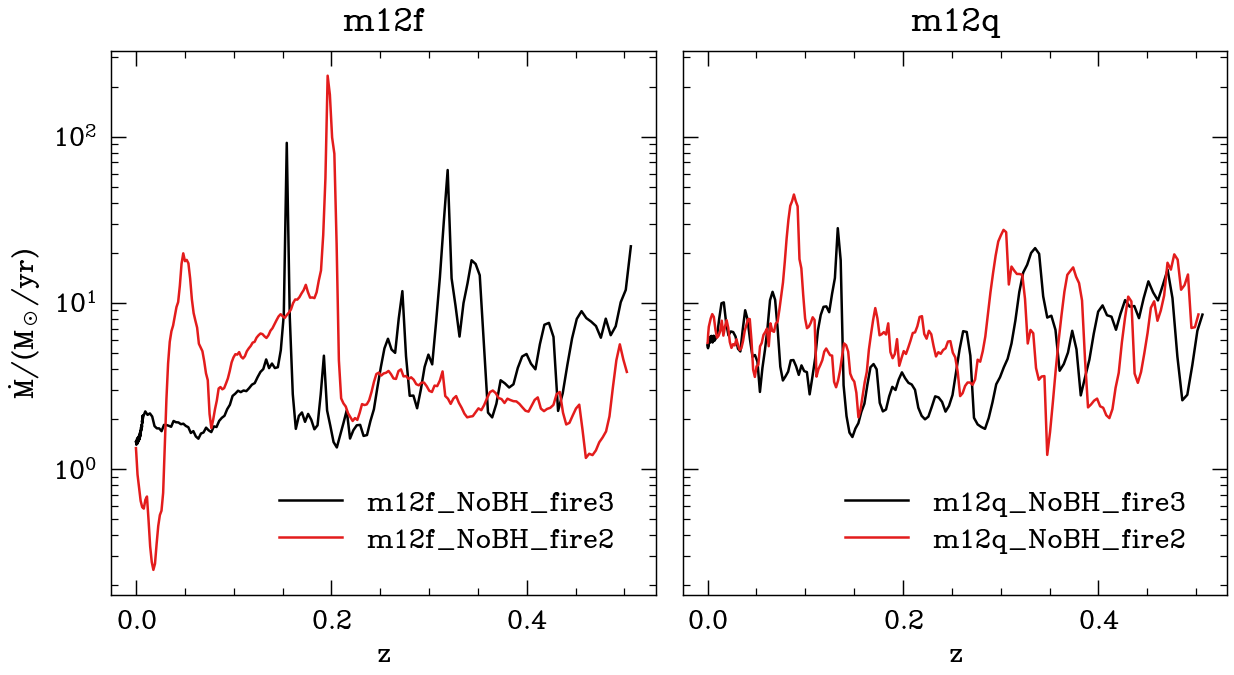

In [39]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*2,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    i = 0 if 'm12f' in k else 1
    axes[i].set_title(k.split('_')[0])
    
    y = [-Sim.Mdot_profile['Mdot'][np.argmin(np.abs(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'] - 0.25))] for Sim in v]
    x = [Sim.Redshift[()] for Sim in v]
    axes[i].plot(x,y, label=k)
    axes[i].legend(loc=4)
    
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

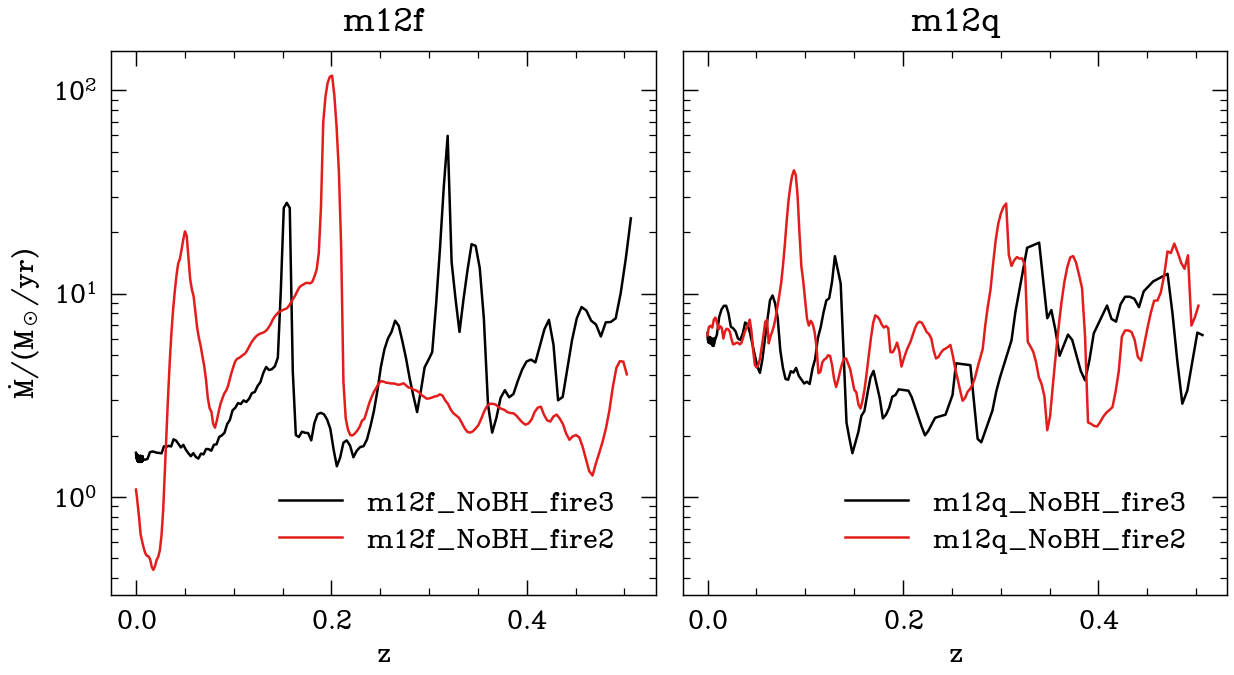

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*2,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    i = 0 if 'm12f' in k else 1
    axes[i].set_title(k.split('_')[0])

    y = [Sim.Mdot_profile['Mdot_outflows'][1] for Sim in v]
    x = [Sim.Redshift[()] for Sim in v]
    axes[i].plot(x,y, label=k)
    axes[i].legend(loc=4)
    
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

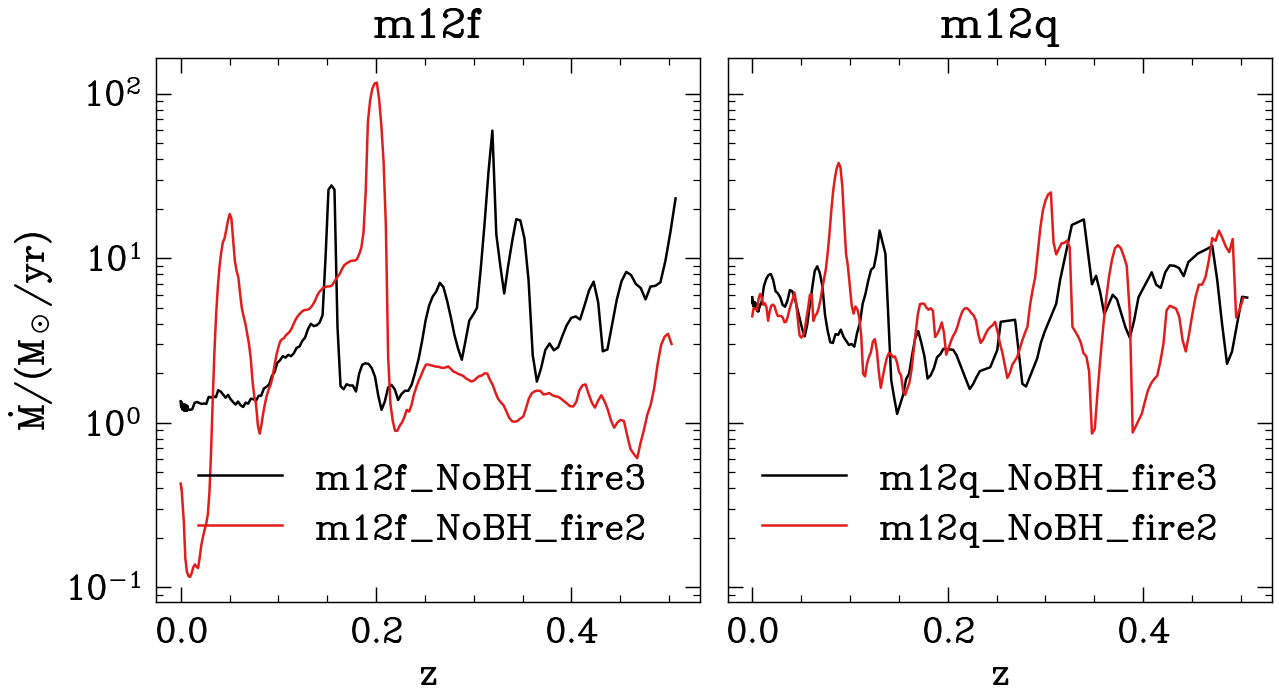

In [30]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*2,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    i = 0 if 'm12f' in k else 1
    axes[i].set_title(k.split('_')[0])

    y = [Sim.Mdot_profile['Mdot_outflows'][2] for Sim in v]
    x = [Sim.Redshift[()] for Sim in v]
    axes[i].plot(x,y, label=k)
    axes[i].legend(loc=4)
    
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

In [6]:
plt.rcParams.update({'font.size': 20})

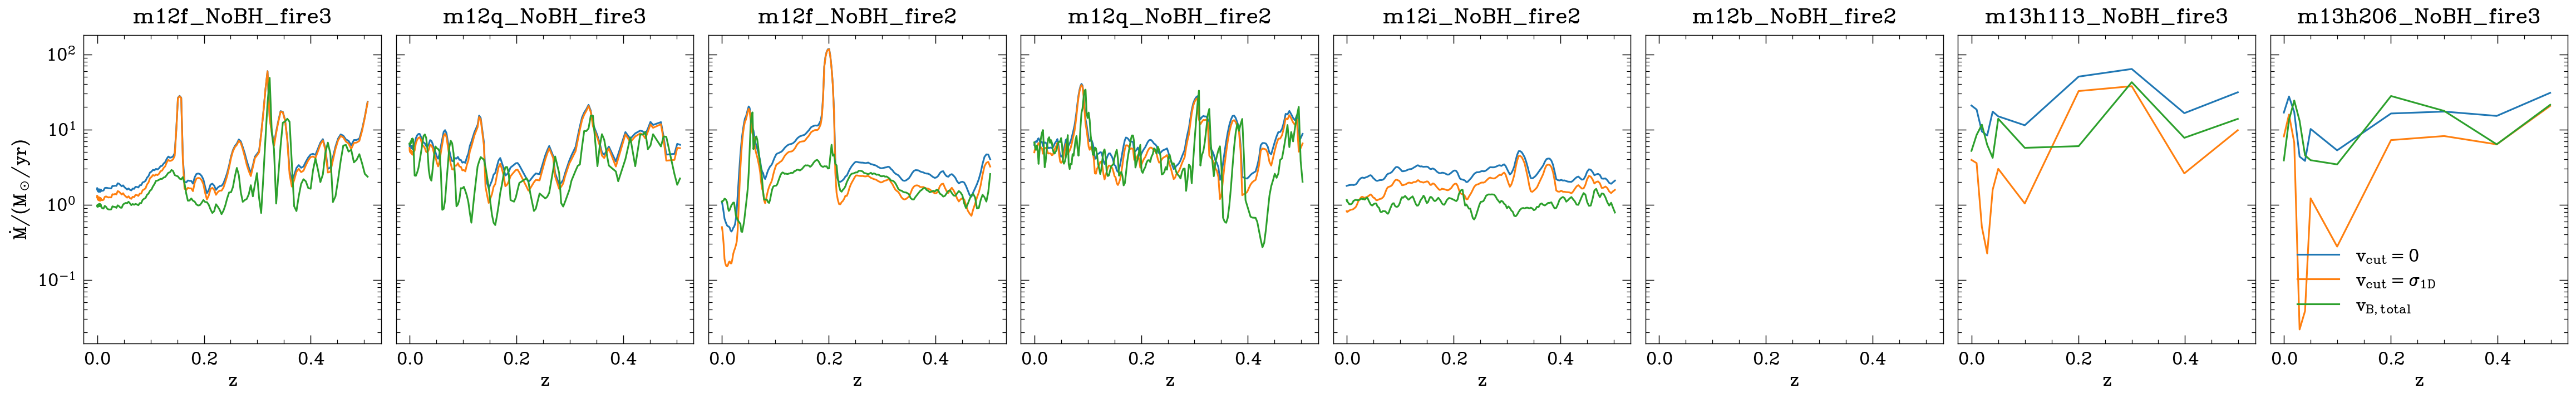

In [21]:
fig, axes = plt.subplots(1, 8, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*8,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    axes[i].set_title(k)

    for j,l in zip(range(1,4),[r'$v_{\mathrm{cut}}=0$',r'$v_{\mathrm{cut}}=\sigma_{\mathrm{1D}}$','$v_{\mathrm{B,total}}$']):
        y = [Sim.Mdot_profile['Mdot_outflows'][j] for Sim in v]
        x = [Sim.Redshift[()] for Sim in v]
        axes[i].plot(x,y, label=l)
axes[-1].legend(loc=3)
axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

In [7]:
Sim = res['m12f_NoBH_fire3'][-1]
Rlow, Rhigh = 0.66875, 0.66875
Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)

3.728708428482426 solMass / yr
0.66875 kpc
3.7225354149823184 solMass / yr


In [ ]:
Sim = res['m12q_NoBH_fire2'][-20]
Rlow, Rhigh = .1, .2
Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)

In [11]:
Sim = res['m12i_NoBH_fire2'][-1]
Rlow, Rhigh = 0.0975, 0.0975 #0.125
Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)

5.506562307015115 solMass / yr
0.0975 kpc
5.495297229313827 solMass / yr


In [12]:
Sim = res['m12b_NoBH_fire2'][-1]
Rlow, Rhigh = 0.14937499999999998, 0.14937499999999998
Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)

7.2679637345602925 solMass / yr
0.145 kpc
6.682619645476832 solMass / yr
0.16249999999999998 kpc
9.558746563169025 solMass / yr
0.18 kpc
13.21510168413648 solMass / yr
0.15375 kpc 0.7595792428309549 8.027542977391247 solMass / yr
0.14937499999999998 kpc 0.06554845527880016 7.333512189839093 solMass / yr


In [64]:
plt.rcParams.update({'font.size': 18})
def colormap(k, ax, sim):
    d = getattr(sim, f'cmap_{k}')
    im = ax.pcolormesh(d['X'], d['Y'], d['H'], cmap='Reds', norm=colors.SymLogNorm(linthresh=0.03, vmin=0, vmax=1))
    return im
def makecoolingflow(Sims, fname=None):
    
    ylabels = [r'$\log \left< n_H / \mathrm{cm}^{-3} \right>$', 
            profilelabels['T lin'],
            r'$ < \mathcal{M} >$',
            r'$\log \left< t_{\mathrm{cool}} / \mathrm{Gyr} \right>$',
            r'$\log < K >$'
            ]

    prolabels = ['nH', 'T', 'MachNumber', 'tcool', 'K']
    
    fig, axes = plt.subplots(len(ylabels), len(Sims), sharex='col', sharey='row', gridspec_kw={'wspace': .05, 'hspace':.25}, figsize=[4.8*len(Sims),4.8*len(ylabels)], dpi=150, facecolor='w')
    
    for mi,Sim in enumerate(Sims):
        pro = Sim.pro
        rmid = pro['rmid']*pro['Rvir']

        axes[3,mi].axhline(np.log10(Sim.tHubble), label=r'$t_H$', c='k')
        #TODO axes[3,mi].axhline(np.log10(Sim.tHubble * (1+Sim.Redshift)**(-3/2)), c='r')
        axes[3,mi].axvline(np.log10(Sim.Rcool), label=r'$R_{\mathrm{cool}}$', c='k', ls='-.')
        if mi==2: axes[3,mi].legend()

        axes[-1,mi].set_xlabel('$\log (r/\mathrm{pkpc})$')

        # Add FIRE-3 curves
        for ax, ylabel, prolabel in zip(axes[:,mi], ylabels, prolabels):
            ax.set_xlim(.4,3); print(np.log10(1.2*pro['Rvir'])) #2.65
            # ax.axvline(np.log10(0.05*pro['Rvir']))
            ax.axvline(np.log10(Sim.Rcool), c='k', ls='-.')
            ax.set_xlim(np.log10(0.05*pro['Rvir']))
            ax.plot(np.log10(rmid), pro[prolabel], 'k--', label='FIRE')
            ax.xaxis.set_tick_params(labelbottom=True)
            ax.set_xlabel('$\log (r/\mathrm{pkpc})$')
            if mi==0: ax.set_ylabel(ylabel)
            if prolabel=='nH': ax.set_title(['_'.join(v.split('_')[:2]) for k,v in PaperSimNames.items() if v==Sim.simname][0] + f' z={Sim.Redshift[()]:.2f}')#ax.set_title(Sim.simname.split('_')[0])
        for ax in axes[(0,2,3),0].flatten():
            ax.set_xlim(ax.get_xlim())
            ax.set_ylim(ax.get_ylim())
        axes[1,0].set_ylim(5,7.5)
        axes[2,mi].set_ylim(-1,1)
        axes[4,0].set_ylim(12,14.75)
        # Add FIRE-3 colormaps
        im = colormap('nH', axes[0,mi], Sim)
        colormap('T', axes[1,mi], Sim)
        colormap('MachNumber', axes[2,mi], Sim)
        colormap('tcool', axes[3,mi], Sim)
        # colormap('Z', axes[4,mi], Sim)
        colormap('K', axes[4,mi], Sim)

        # Add cooling flow Rcirc solution curves
        res = Sim.transonic_solution#stalled_solution#
        res_x = np.log10(res.Rs().to(un.kpc).value)

        axes[0,mi].plot(res_x, np.log10(res.nHs().to(un.cm**-3).value), label=f'$\dot{{M}}={res.Mdot.value:.2f}\ M_\odot/\mathrm{{yr}}$')
        axes[1,mi].plot(res_x, np.log10(res.Ts().to(un.K).value))
        axes[2,mi].plot(res_x, res.Ms())
        axes[3,mi].plot(res_x, np.log10(res.t_cools().to(un.Gyr).value))
        
        axes[4,mi].plot(res_x, np.log10((res.P2ks().to(un.K/un.cm**3) / (res.rhos().to(un.Msun/un.kpc**3)/1e10)**(5/3)).value))

        # axes[0,mi].set_xlim(0.4,3)
        axes[0,mi].legend(loc=3)

    # Add the colorbar to the figure
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.3]) # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    cbar.set_label('radial bin fraction')
    fig.tight_layout()
    if fname: plt.savefig(fname, bbox_inches='tight')

In [117]:
def makecoolingflowratios(Sims, fname=None):
    
    ylabels = [r'$\log \left< n_H / \mathrm{cm}^{-3} \right>$', 
            profilelabels['T lin'],
            r'$\log < K >$'
            ]

    prolabels = ['nH', 'T', 'K']
    
    fig, axes = plt.subplots(len(ylabels), 1, sharex='col', sharey='row', gridspec_kw={'wspace': .05, 'hspace':.1}, figsize=[4.8*1,4.8*len(ylabels)], dpi=150, facecolor='w')
    
    for mi,Sim in enumerate(Sims):
        pro = Sim.pro
        rmid = pro['rmid']*pro['Rvir']

        axes[-1].set_xlabel('$\log (r/\mathrm{pkpc})$')

        # Add FIRE-3 curves
        for ax, ylabel, prolabel in zip(axes, ylabels, prolabels):
            break
            if mi==0: ax.set_ylabel(ylabel)

        # # Add FIRE-3 colormaps
        # im = colormap('nH', axes[0], Sim)
        # colormap('T', axes[1], Sim)
        # colormap('MachNumber', axes[2], Sim)
        # colormap('tcool', axes[3], Sim)
        # # colormap('Z', axes[4,mi], Sim)
        # colormap('K', axes[4], Sim)

        # Add cooling flow Rcirc solution curves
        res = Sim.transonic_solution#stalled_solution#
        res_x = np.log10(res.Rs().to(un.kpc).value)

        CF_nH = res.nHs().to(un.cm**-3).value
        CF_T = res.Ts().to(un.K).value
        CF_K = (res.P2ks().to(un.K/un.cm**3) / (res.rhos().to(un.Msun/un.kpc**3)/1e10)**(5/3)).value
        # axes[0].plot(res_x, np.log10(res.nHs().to(un.cm**-3).value), label=f'$\dot{{M}}={res.Mdot.value:.2f}\ M_\odot/\mathrm{{yr}}$')
        # axes[1].plot(res_x, np.log10(res.Ts().to(un.K).value))
        # axes[2].plot(res_x, np.log10((res.P2ks().to(un.K/un.cm**3) / (res.rhos().to(un.Msun/un.kpc**3)/1e10)**(5/3)).value))
        
        rmid2 = rmid[rmid<10**res_x.max()]
        axes[0].plot(np.log10(rmid2), interp1d(10**res_x, CF_nH)(rmid2) / 10**pro['nH'][rmid<10**res_x.max()], label=Sim.simname.split('_')[0])
        axes[1].plot(np.log10(rmid2), interp1d(10**res_x, CF_T)(rmid2) / 10**pro['T'][rmid<10**res_x.max()])
        axes[2].plot(np.log10(rmid2), interp1d(10**res_x, CF_K)(rmid2) / 10**pro['K'][rmid<10**res_x.max()])

        # axes[0,mi].set_xlim(0.4,3)
        axes[0].legend(bbox_to_anchor=(1.05, 1))
        for ax in axes: ax.set_ylim(0,2.5)
        axes[0].set_xlim(1.5,3)
    axes[0].set_ylabel('$n_{H, CF} / n_{H, sim}$')
    axes[1].set_ylabel('$T_{CF} / T_{sim}$')
    axes[2].set_ylabel('$K_{CF} / K_{sim}$')
    for ax in axes: ax.axhline(1)
    # # Add the colorbar to the figure
    # cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.3]) # [left, bottom, width, height]
    # cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    # cbar.set_label('radial bin fraction')
    # fig.tight_layout()
    # if fname: plt.savefig(fname, bbox_inches='tight')

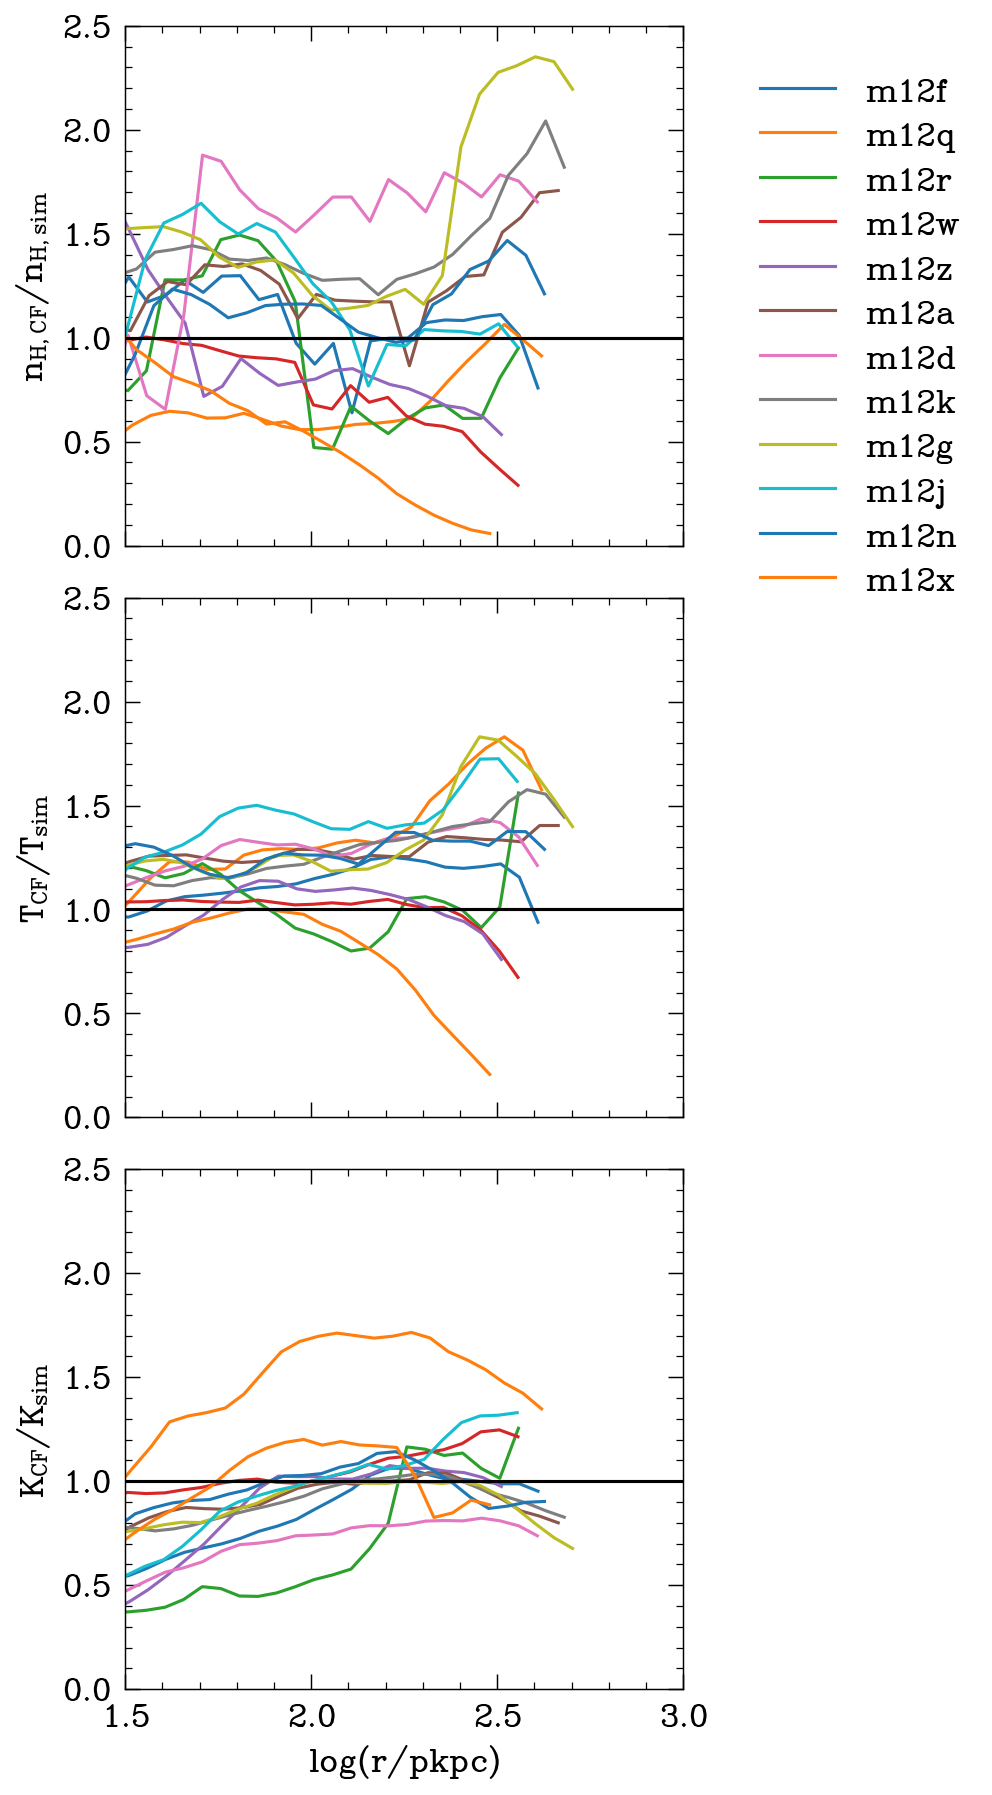

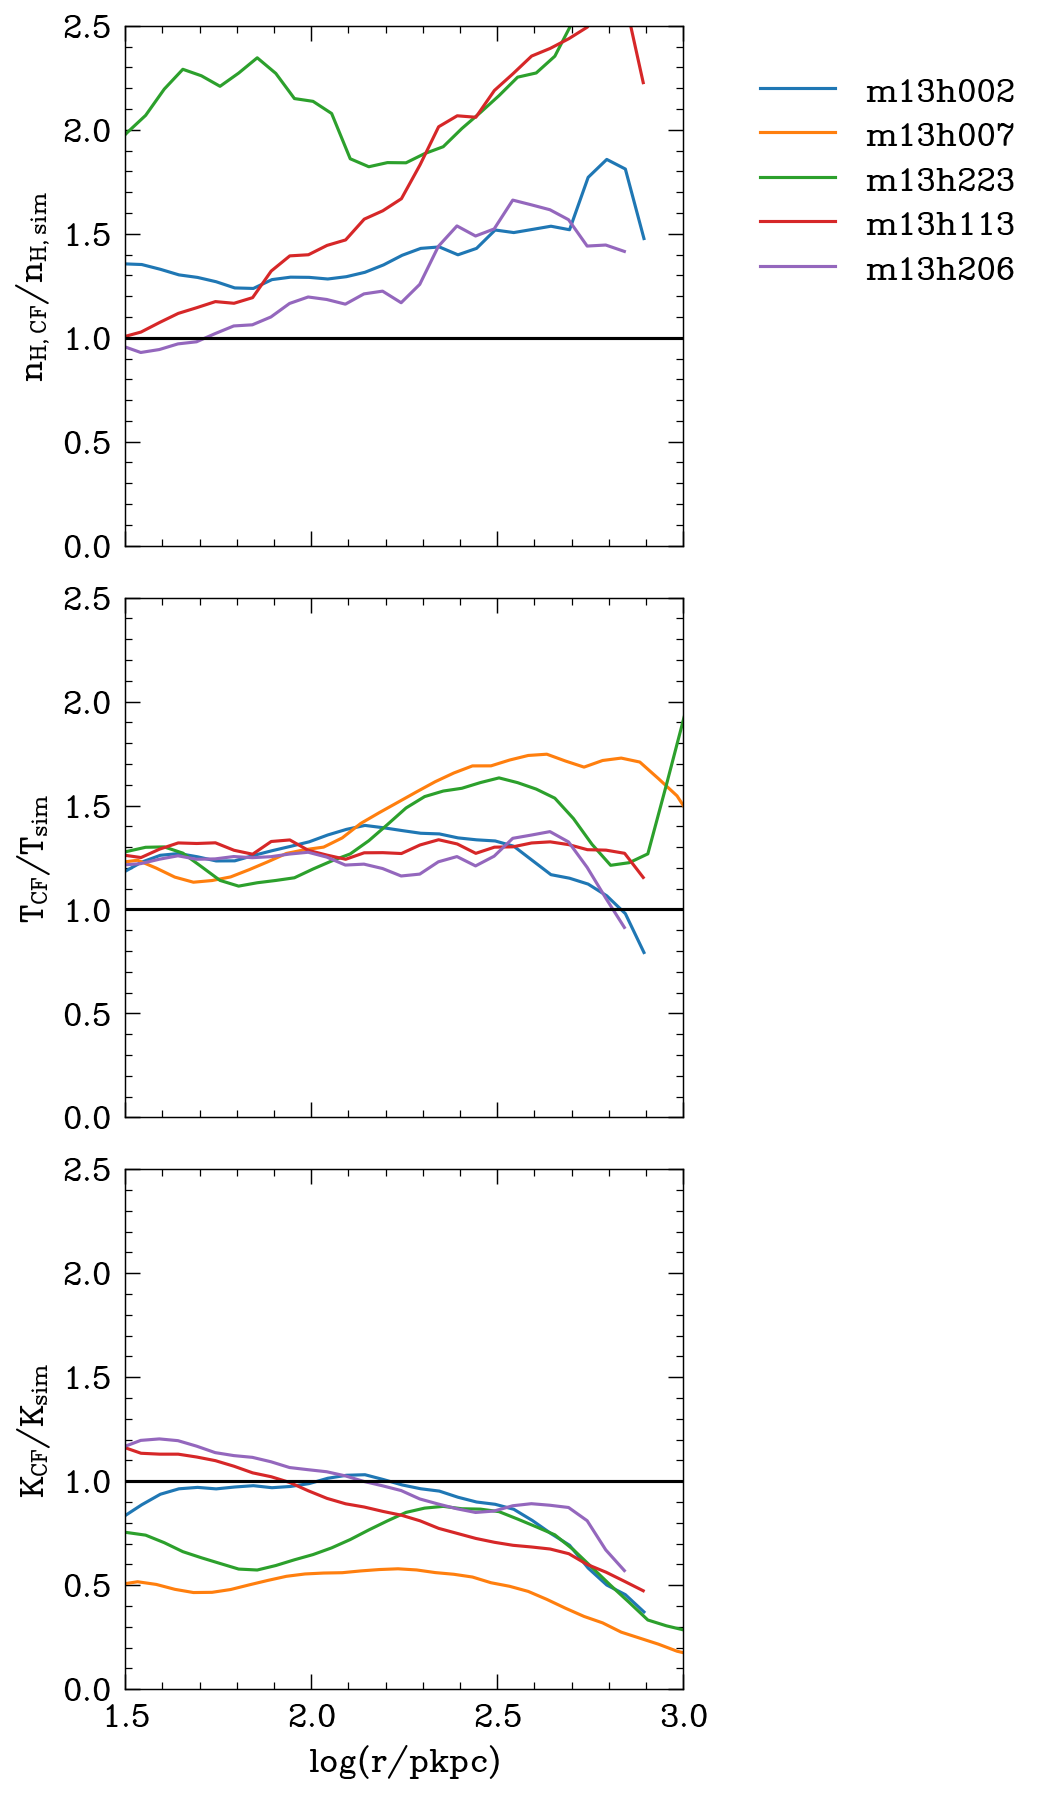

In [118]:
makecoolingflowratios([res_cf['m12f_NoBH'], res_cf['m12q_NoBH'], res_cf['m12r_NoBH'], res_cf['m12w_NoBH'], res_cf['m12z_NoBH'], res_cf['m12a_NoBH'], res_cf['m12d_NoBH'], res_cf['m12k_NoBH'], res_cf['m12g_NoBH'], res_cf['m12j_NoBH'], res_cf['m12n_NoBH'], res_cf['m12x_NoBH']])
makecoolingflowratios([res_cf['m13h002_NoBH'], res_cf['m13h007_NoBH'], res_cf['m13h223_NoBH'], res_cf['m13h113_NoBH'], res_cf['m13h206_NoBH']])

2.519637356136773
2.519637356136773
2.519637356136773
2.519637356136773
2.519637356136773
2.5418892222037086
2.5418892222037086
2.5418892222037086
2.5418892222037086
2.5418892222037086
2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5422440663405905


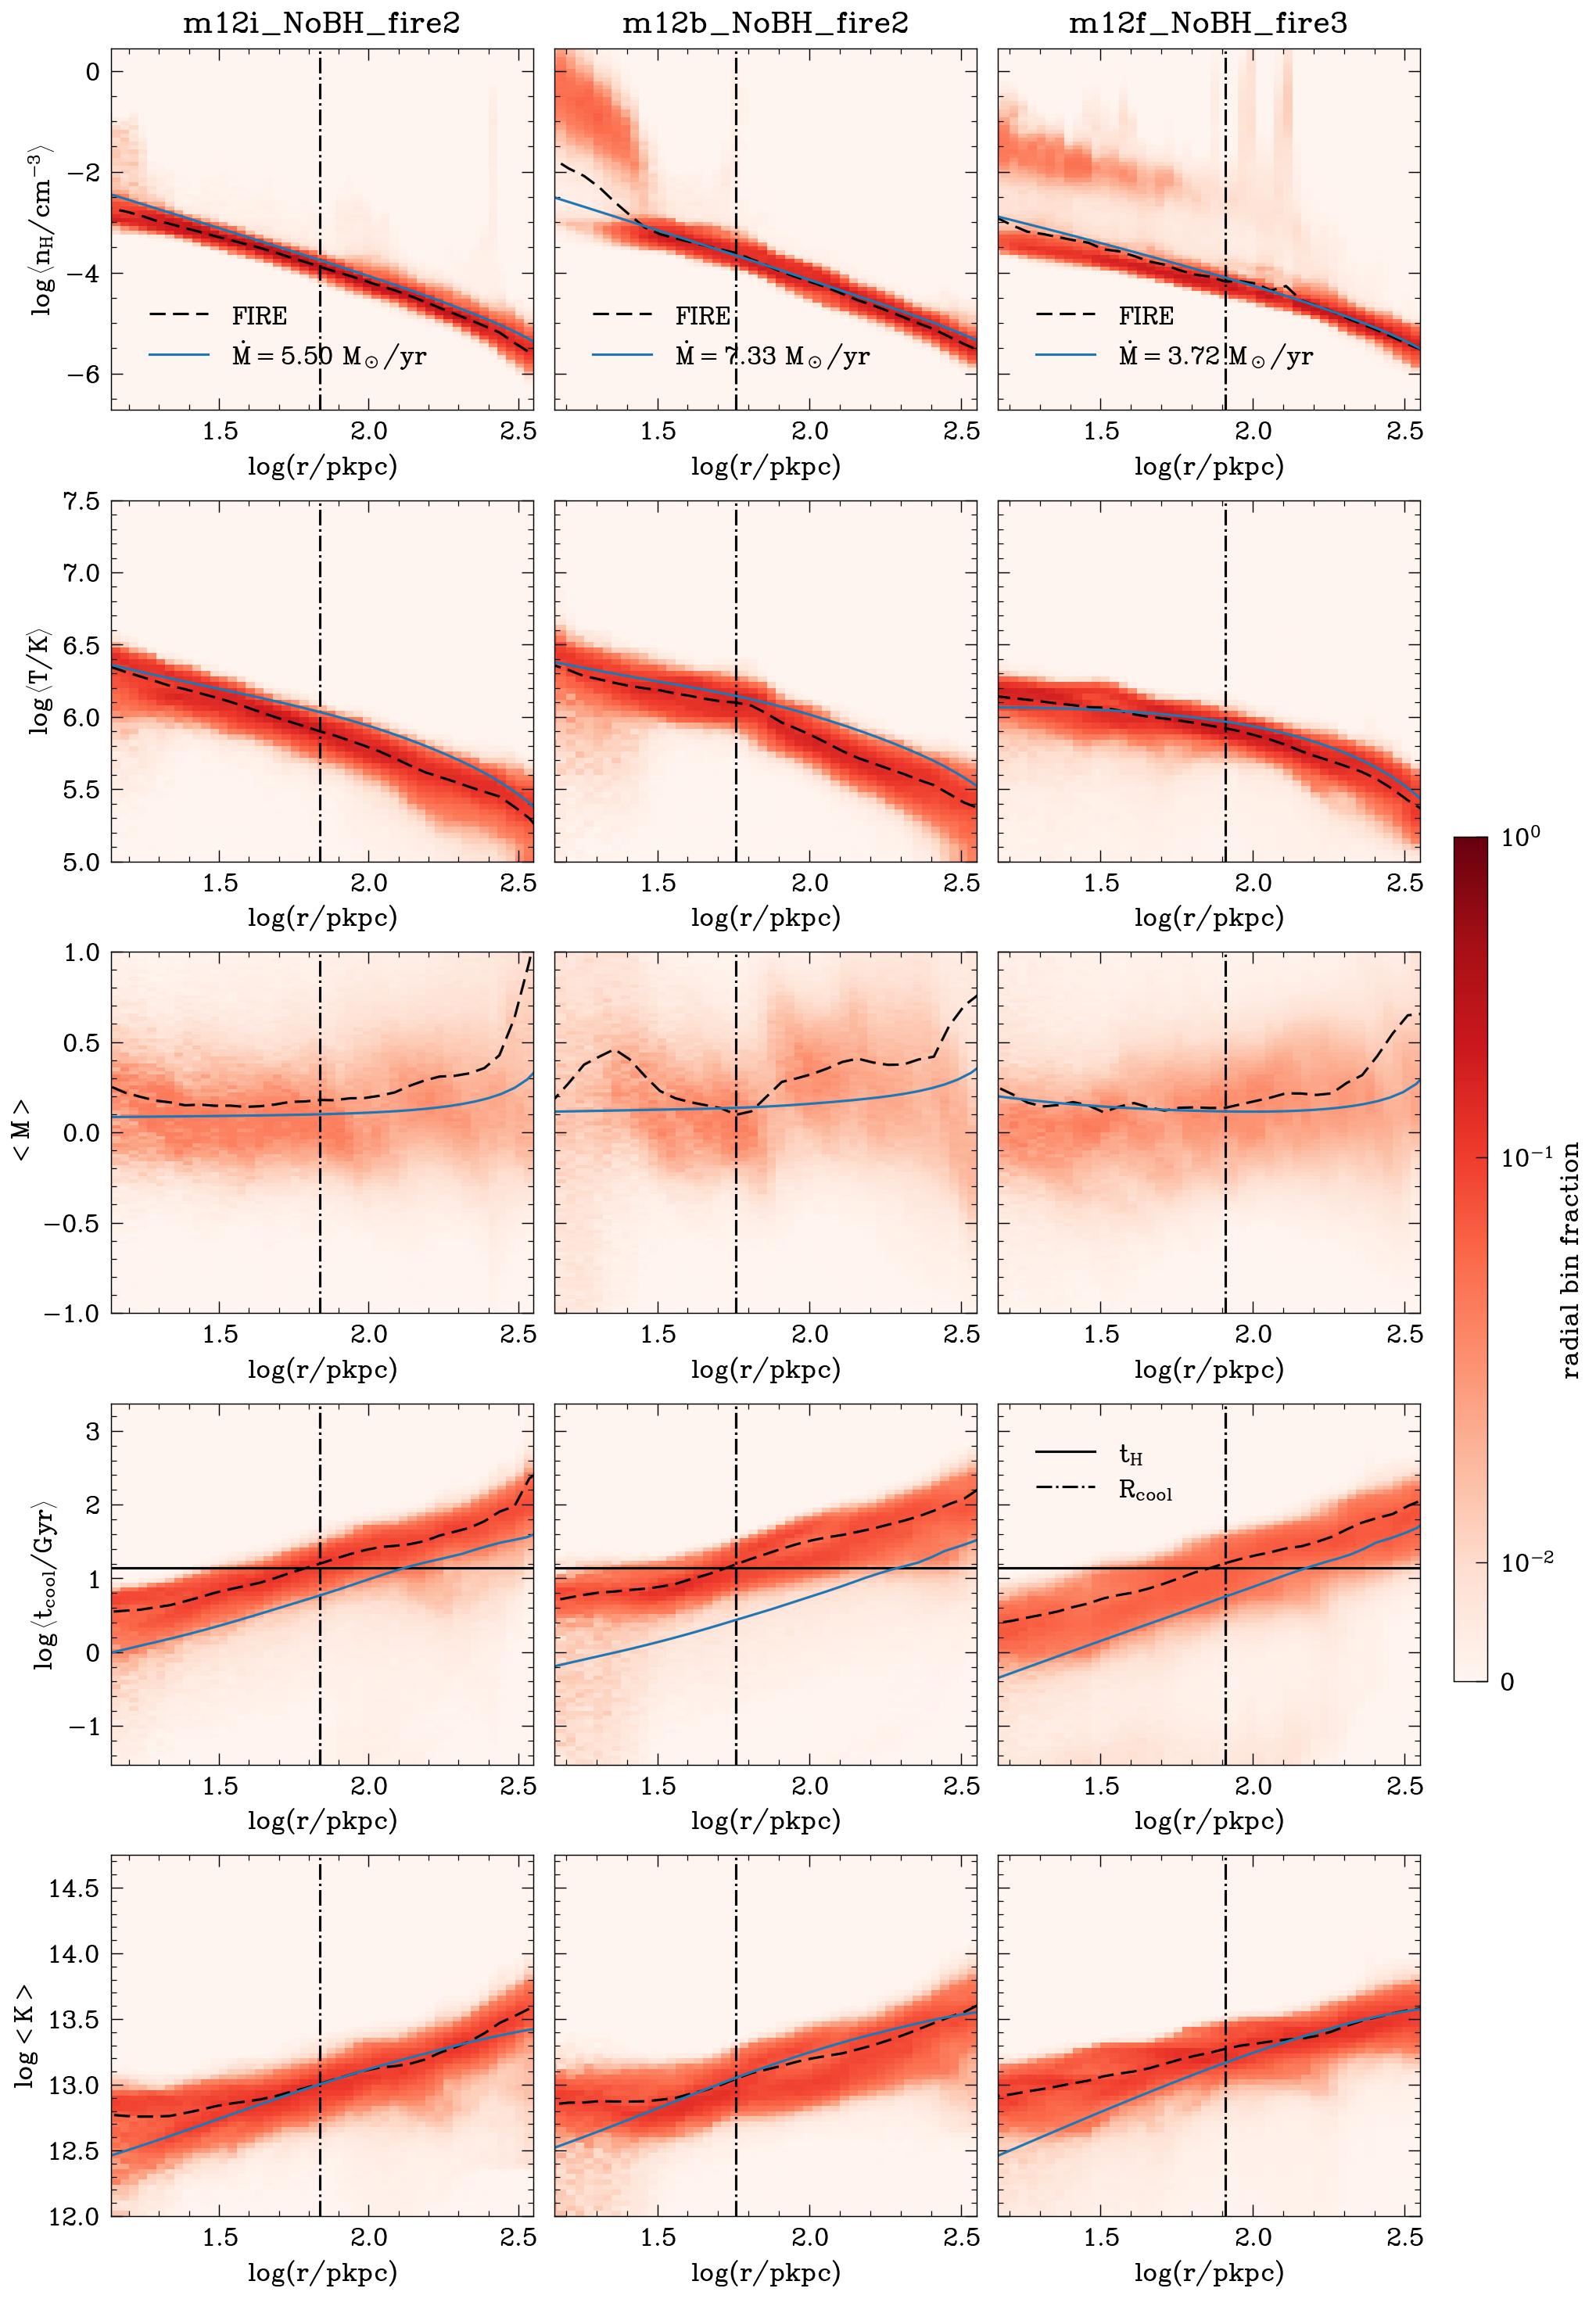

In [13]:
makecoolingflow([res['m12i_NoBH_fire2'][-1], res['m12b_NoBH_fire2'][-1], res['m12f_NoBH_fire3'][-1]])

In [7]:
res_cf = {k : v[-1] for k,v in res.items() if 'fire2' not in k}

In [8]:
res_cf

{'m13h002_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9c0608b0>,
 'm13h007_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9c050430>,
 'm13h009_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9c0709a0>,
 'm13h029_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9c070ac0>,
 'm13h031_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9c050370>,
 'm13h037_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb93c86e20>,
 'm13h113_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb93ca2d00>,
 'm13h206_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9d159640>,
 'm13h217_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9c872fa0>,
 'm13h223_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb93c86880>,
 'm13h236_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb93ca20d0>,
 'm12a_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9d14ee20>,
 'm12d_NoBH': <scripts.analytic_modeling.Simulation at 0x7fdb9e078ac0>,
 'm12e_NoBH': <scripts.analytic

In [108]:
Sim = res_cf['m13h007_NoBH']
cooling = Cool.Wiersma_Cooling(Sim.Z2Zsun, Sim.Redshift)


def solution(R_sonic, R_min=1, R_max=1.5):
    return CF.shoot_from_sonic_point(Sim.potential, cooling, R_sonic=R_sonic, R_max=R_max*Sim.potential.Rvir, R_min=R_min*un.kpc)

reslist = Parallel(n_jobs=-1)(delayed(solution)(Rsonic*un.kpc) for Rsonic in np.linspace(0.05,.09))

/Users/imran/Downloads/movies/cooling_flow/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/Users/imran/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/imran/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/imran/Downloads/movies/cooling_flow/WiersmaCooling.py:46: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/Users/imran/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/_rgi.py:358: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.value

(1.3, 2.5)

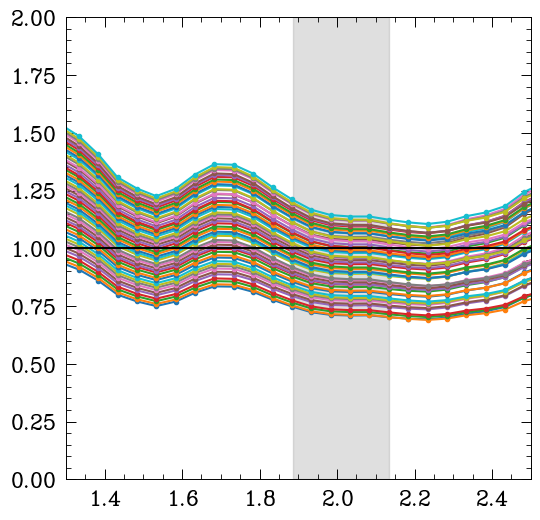

In [110]:
pro = Sim.pro
rmid = pro['rmid']*pro['Rvir']

chi2 = []
for Rsonic, res in zip(np.linspace(0.05,2), reslist):
    try:
        res_x = np.log10(res.Rs().to(un.kpc).value)
        rmid2 = rmid[rmid<10**res_x.max()]

        CF_K = (res.P2ks().to(un.K/un.cm**3) / (res.rhos().to(un.Msun/un.kpc**3)/1e10)**(5/3)).value
        plt.plot(np.log10(rmid2), 10**pro['K'][rmid<10**res_x.max()] / interp1d(10**res_x, CF_K)(rmid2), '.-')

        idx = (0.1*pro['Rvir']<=rmid)&(rmid<=Sim.Rcool)
        ob = 10**pro['K'][idx]
        ex = interp1d(10**res_x, CF_K)(rmid[idx])
        chi2.append(np.sum((ob - ex)**2 / ex) / (len(ex)-1))
    except:
        continue
    

plt.axhline(1)
plt.axvspan(np.log10(0.1*Sim.pro['Rvir']), np.log10(Sim.Rcool), alpha=0.25, color='gray')
plt.ylim(0,2)
plt.xlim(1.3,2.5)

2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276


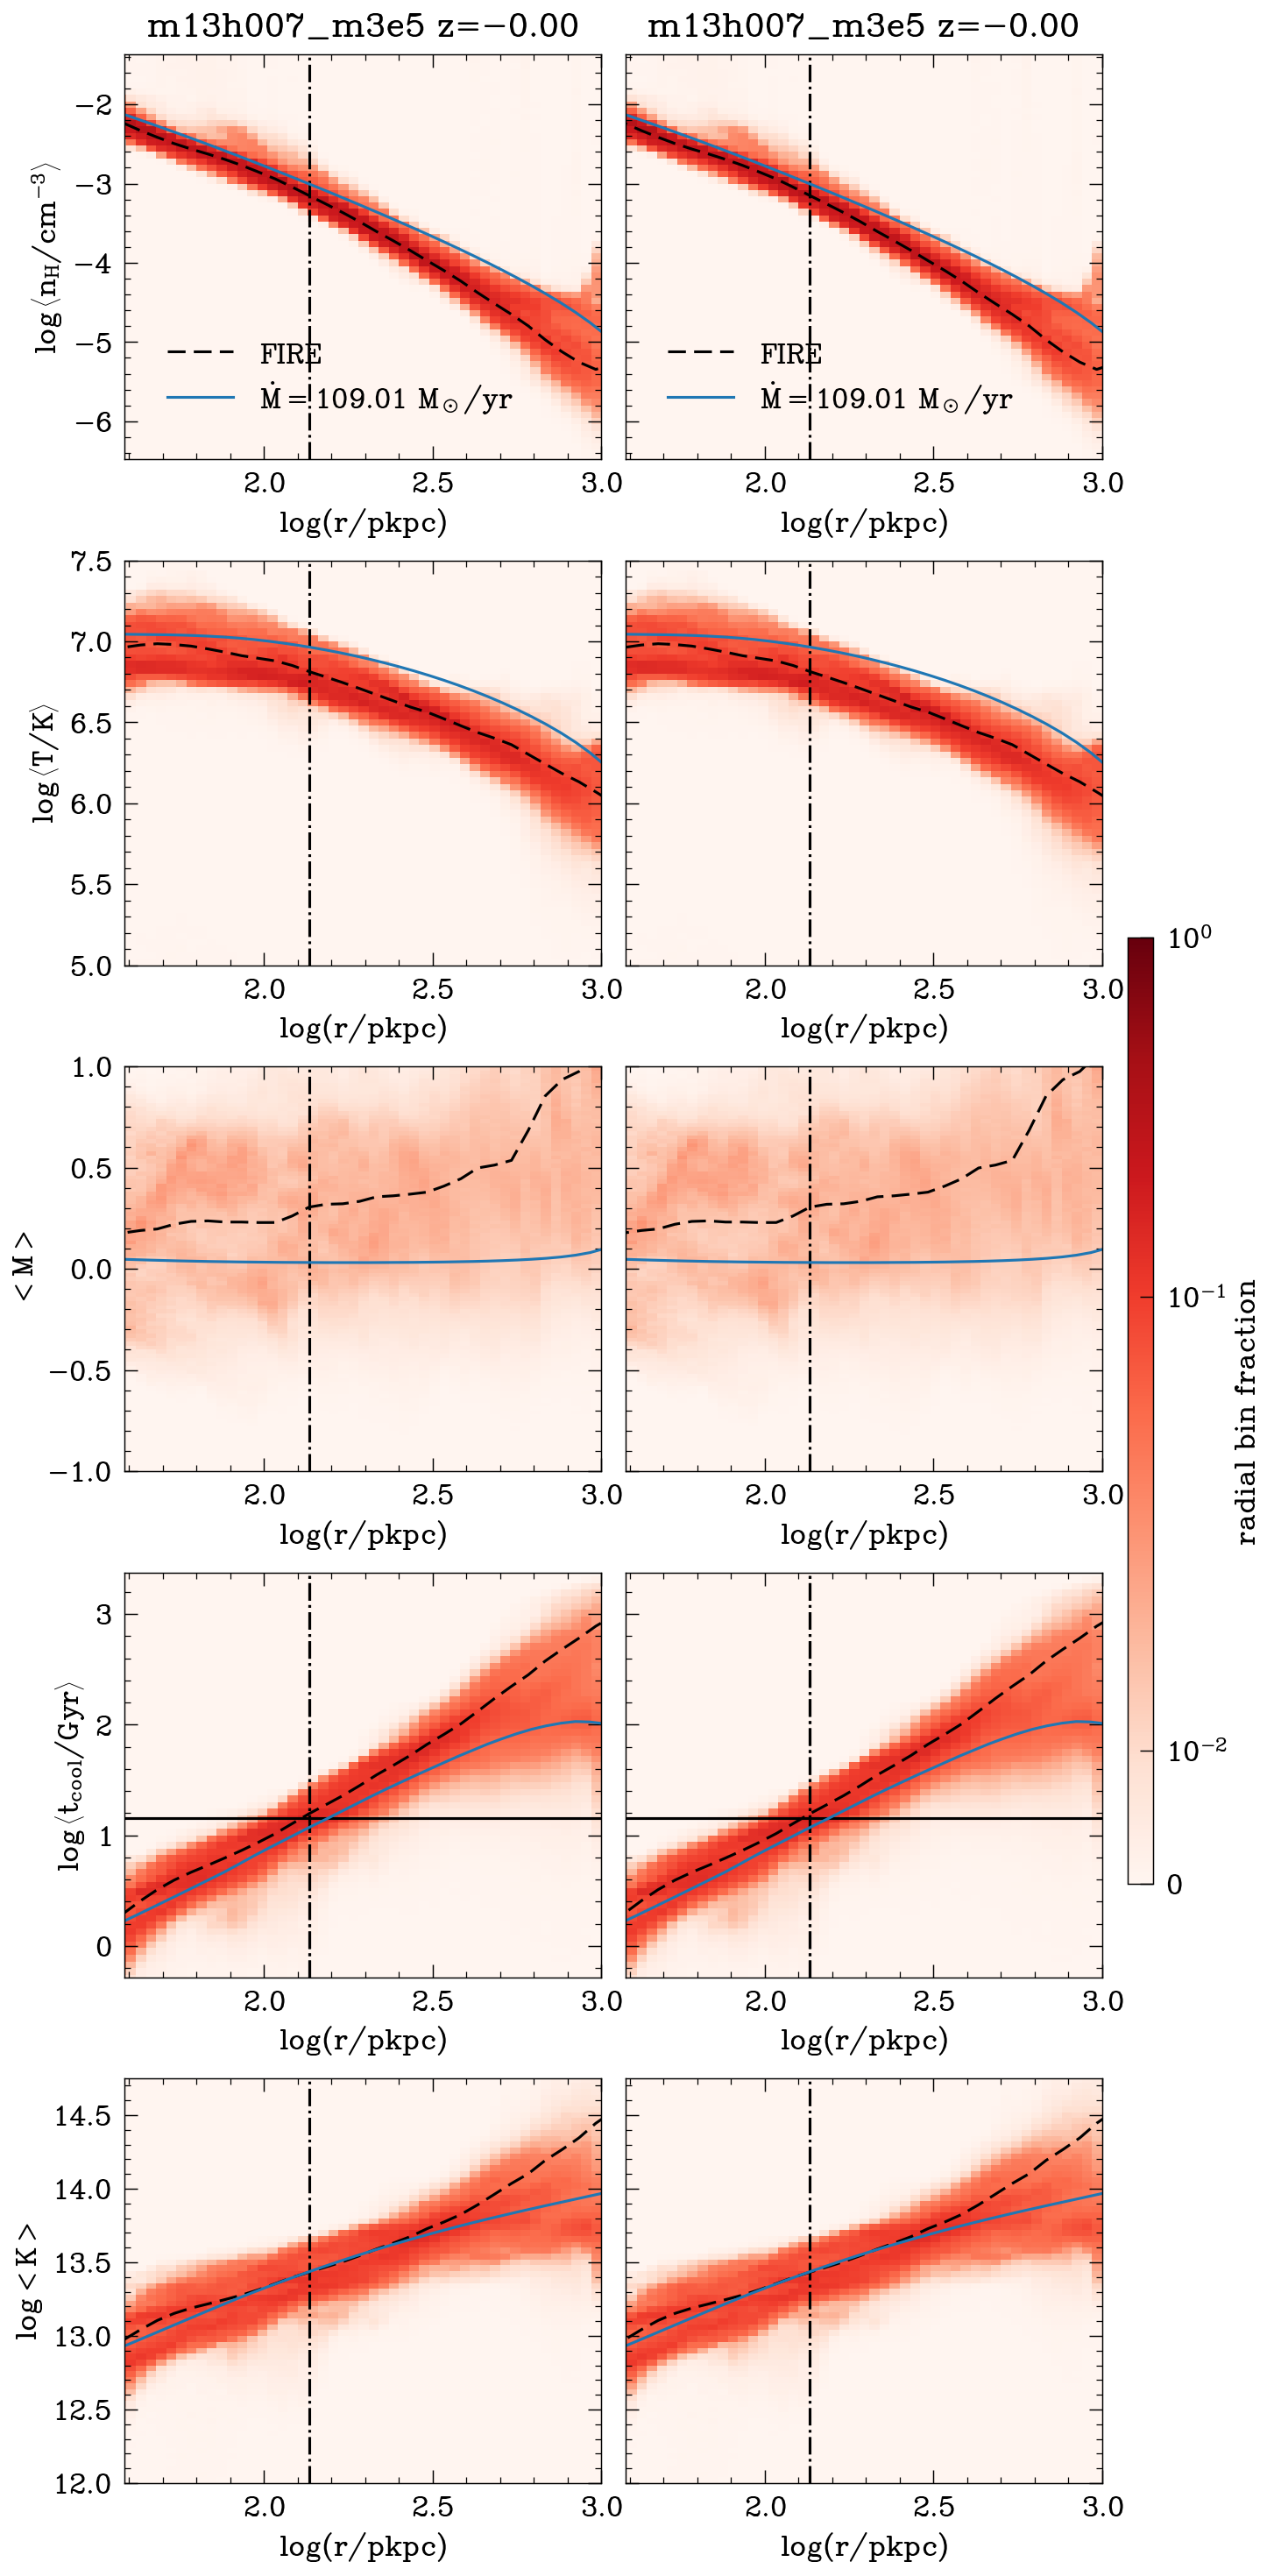

In [111]:
Sim.transonic_solution = reslist[np.argmin(chi2)]
makecoolingflow([Sim, Sim])

ValueError: x and y must have same first dimension, but have shapes (50,) and (37,)

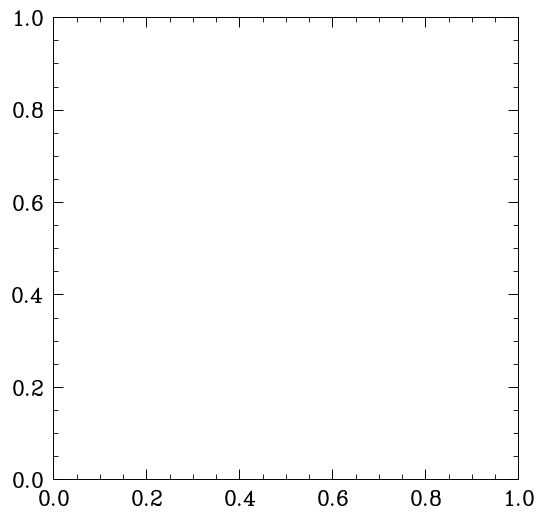

In [103]:
plt.plot(np.linspace(0.05,2), chi2, '.')
plt.yscale('log')

In [12]:
bounds = {'m12f_NoBH': 0.66875,
'm12q_NoBH': 0.29500000000000004,
'm12r_NoBH': 1.5625,
'm12w_NoBH': 0.4,
'm12z_NoBH': 2.09375,
'm12a_NoBH': 0.49375,
'm12d_NoBH': 1.71875,
'm12k_NoBH': 0.21640625000000002,
'm12g_NoBH': 0.14296875000000003,
'm12j_NoBH': 0.875,
'm12n_NoBH': 0.45625000000000004,
'm12x_NoBH': 0.32499999999999996,
'm13h002_NoBH': 0.03486328125,
'm13h007_NoBH': 0.174365234375,
'm13h223_NoBH': 0.034648437500000004,
'm13h113_NoBH': 0.0303125,
'm13h206_NoBH':0.05484375}

'''
'm13h217_NoBH': 0.06568359375 (z=2.5)


    
'm12e_NoBH': Mdot Nan
'm12u_NoBH': Mdot Nan

'm13h113_NoBH':(0.0303125, 0.0303125), 'm13h206_NoBH':(0.05484375, 0.05484375)
'''

"\n'm13h217_NoBH': 0.06568359375 (z=2.5)\n\n\n    \n'm12e_NoBH': Mdot Nan\n'm12u_NoBH': Mdot Nan\n\n'm13h113_NoBH':(0.0303125, 0.0303125), 'm13h206_NoBH':(0.05484375, 0.05484375)\n"

In [19]:
def procsim(k):
    Sim = res_cf[k]
    Rlow, Rhigh = bounds[k], bounds[k]
    Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)
    return Sim

for k in bounds.keys():
    if 'm12' not in k: continue
    print(k)
    try:
        Sim = res_cf[k]
        Rlow, Rhigh = bounds[k], bounds[k]
        Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)
    except:
        pass
    print()
# Sims = Parallel(n_jobs=-1, verbose=10)(delayed(procsim)(k) for k in bounds.keys())

m12f_NoBH
3.728708428482426 solMass / yr
0.66875 kpc
4.384280640566731 solMass / yr

m12q_NoBH
2.89507912134337 solMass / yr
0.29500000000000004 kpc
3.0485389423740483 solMass / yr

m12r_NoBH
2.43008352420266 solMass / yr
1.5625 kpc
1.8968999028483184 solMass / yr

m12w_NoBH
0.2590367084647908 solMass / yr
0.4 kpc
0.2738538460275098 solMass / yr

m12z_NoBH
1.5432598060619729 solMass / yr
2.09375 kpc
1.6856570098877874 solMass / yr

m12a_NoBH
9.737026493864018 solMass / yr
0.49375 kpc
12.443357131003342 solMass / yr

m12d_NoBH
10.165591580928277 solMass / yr
1.71875 kpc
20.648697272617262 solMass / yr

m12k_NoBH
14.560494454234206 solMass / yr
0.21640625000000002 kpc
15.016898591382049 solMass / yr

m12g_NoBH
12.903618141877226 solMass / yr
0.14296875000000003 kpc
13.152088672725847 solMass / yr

m12j_NoBH
nan solMass / yr
0.875 kpc

m12n_NoBH
5.769726784594694 solMass / yr
0.45625000000000004 kpc
6.049810451327354 solMass / yr

m12x_NoBH
0.09809815201343872 solMass / yr
0.3249999999999

2.8271924906451846
2.8271924906451846
2.8271924906451846
2.8271924906451846
2.8271924906451846
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
2.966081091422276
3.037611376921929
3.037611376921929
3.037611376921929
3.037611376921929
3.037611376921929
2.825201687365501
2.825201687365501
2.825201687365501
2.825201687365501
2.825201687365501
2.7744858598262483
2.7744858598262483
2.7744858598262483
2.7744858598262483
2.7744858598262483


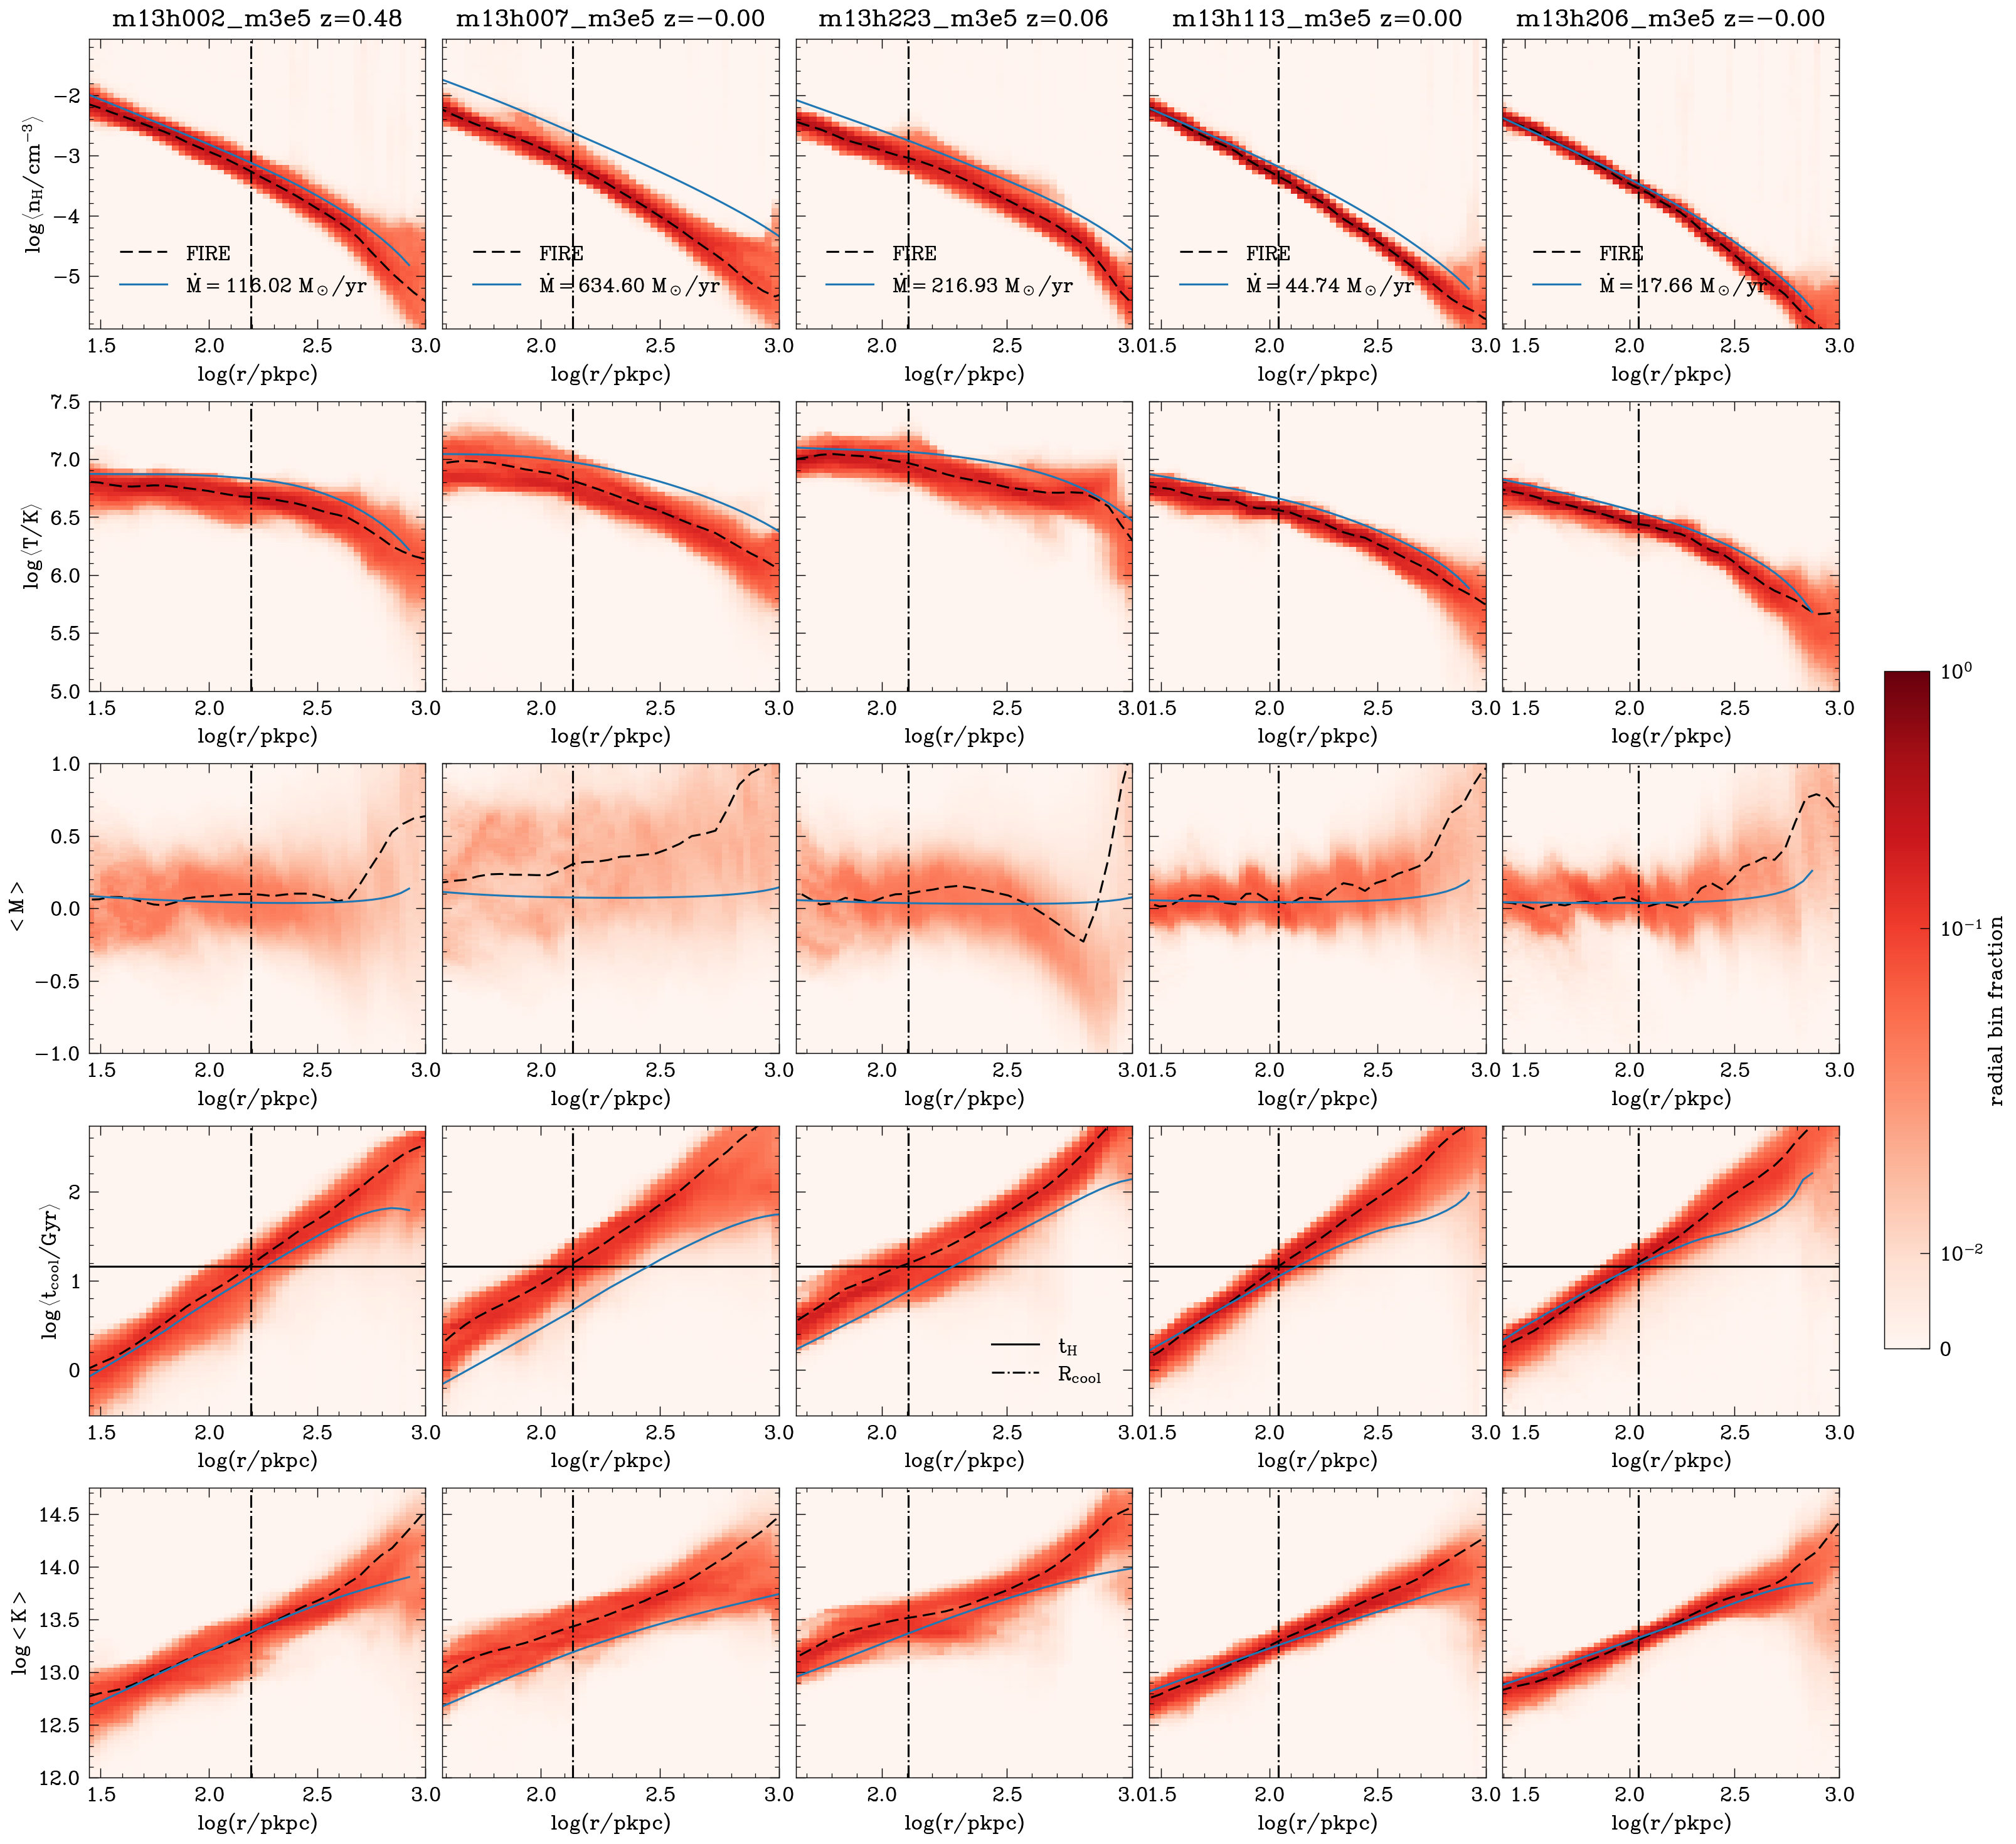

In [15]:
makecoolingflow([res_cf['m13h002_NoBH'], res_cf['m13h007_NoBH'], res_cf['m13h223_NoBH'], res_cf['m13h113_NoBH'], res_cf['m13h206_NoBH']])

In [ ]:
29, 31, 37, 217, 236

In [ ]:
Sim = res_cf['m13h236_NoBH']
print('z= ', Sim.Redshift[()])
Rlow, Rhigh = 0.03, .07
Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)

nan -1.0 0.4788102253052198
nan -1.0 0.5522353439247717
9.737026493864018 -1.0 2.0141221072833546


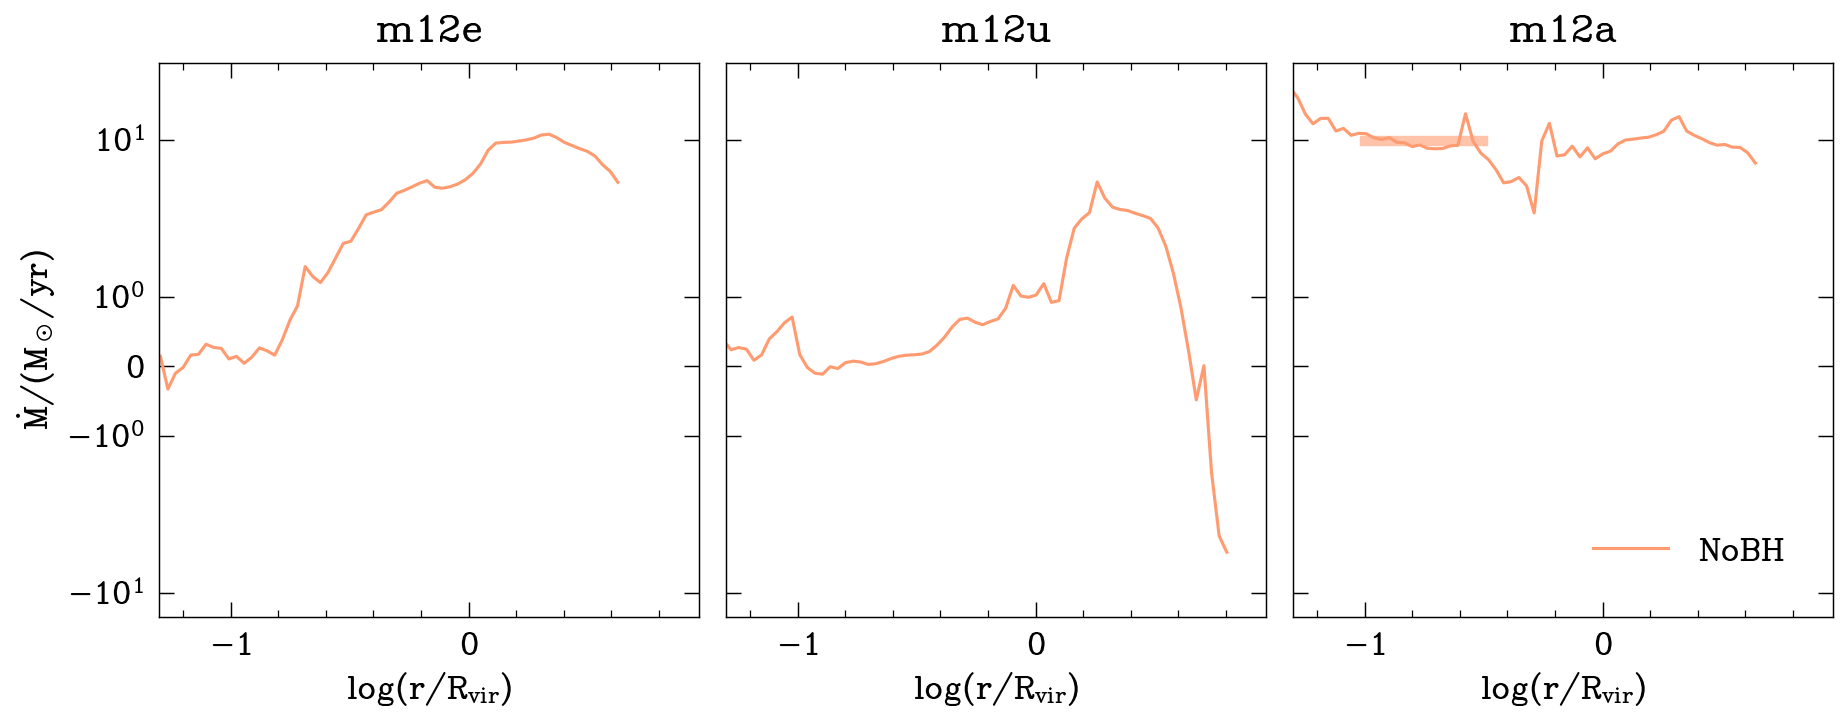

In [38]:
def makeMdotprofile(sims=['m12f', 'm12q', 'm13h113', 'm13h206'], 
                 fname=None):
    fig, axes = plt.subplots(1, len(sims), sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*len(sims),4.8*1], dpi=150)
    for i,sim in enumerate(sims):
        axes[i].set_title(sim)
        for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
            Sim = res_cf[model]
            axes[i].plot(np.log10(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir']), Sim.Mdot_profile['Mdot'], ls, c=COLOR_SCHEME[mi-1], label=model.split('_')[1])
            axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
            axes[i].plot((np.log10(0.1), np.log10(Sim.Rcool/Sim.pro['Rvir'])), (Sim.Mdot_avg.value, Sim.Mdot_avg.value), '-', c=COLOR_SCHEME[mi-1], lw=5, alpha=0.6)#, ls=ls, lw=2)
            print(Sim.Mdot_avg.value, np.log10(0.1), np.log10(Sim.Rcool))
            break
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[-1].legend(loc=4)
    axes[0].set_yscale('symlog')
    axes[0].set_xlim(np.log10(0.05))

    if fname: plt.savefig(fname)
makeMdotprofile(['m12e', 'm12u', 'm12a'])#fname='../Paper2Figs/Mdotprofiles.pdf')

115.39914814947213 -1.0 2.194603824645103
627.847309343061 -1.0 2.133492425422195
216.15391795354117 -1.0 2.1050227109218485
44.583303519703676 -1.0 2.04261302136542
17.679063623291842 -1.0 2.0418971938261676


(1.5848931924611136, 3162.2776601683795)

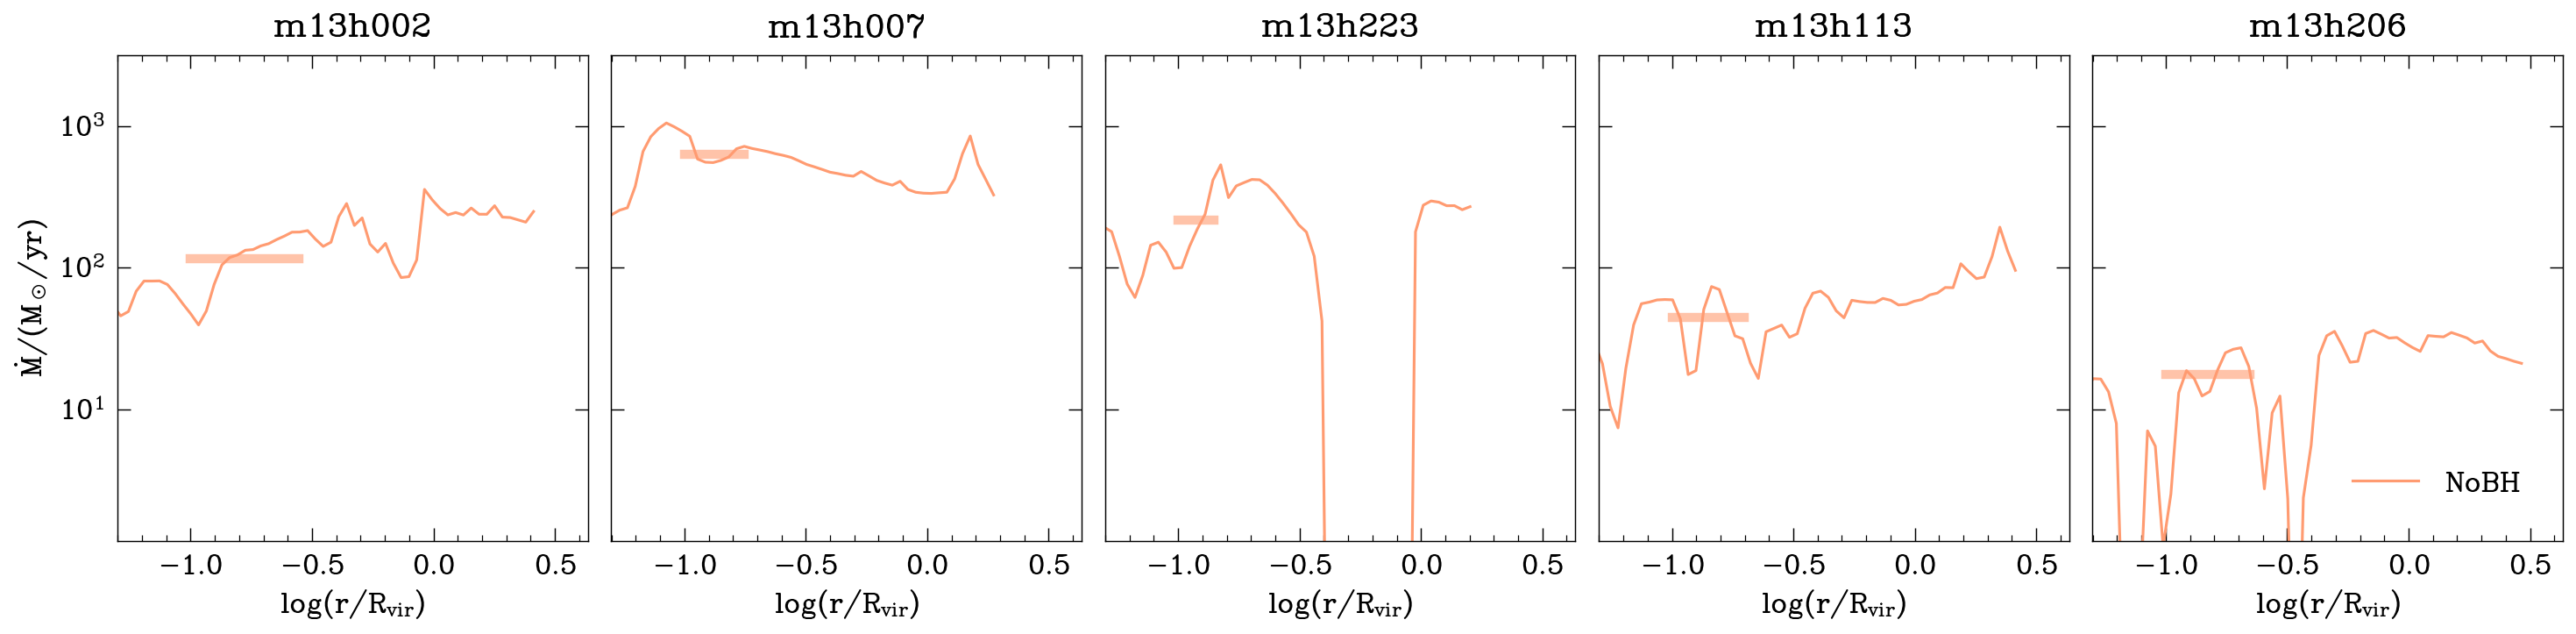

In [125]:
makeMdotprofile(['m13h002', 'm13h007', 'm13h223', 'm13h113', 'm13h206'])
plt.gca().set_ylim(10**0.2,10**3.5)

2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5518887390146623
2.5518887390146623
2.5518887390146623
2.5518887390146623
2.5518887390146623
2.4897337532035646
2.4897337532035646
2.4897337532035646
2.4897337532035646
2.4897337532035646
2.488528442969779
2.488528442969779
2.488528442969779
2.488528442969779
2.488528442969779
2.443894317474943
2.443894317474943
2.443894317474943
2.443894317474943
2.443894317474943
2.5967107732834362
2.5967107732834362
2.5967107732834362
2.5967107732834362
2.5967107732834362
2.5405593011809575
2.5405593011809575
2.5405593011809575
2.5405593011809575
2.5405593011809575
2.6129110210906905
2.6129110210906905
2.6129110210906905
2.6129110210906905
2.6129110210906905
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.6352099365367936
2.559689737352484
2.559689737352484
2.559689737352484
2.5596

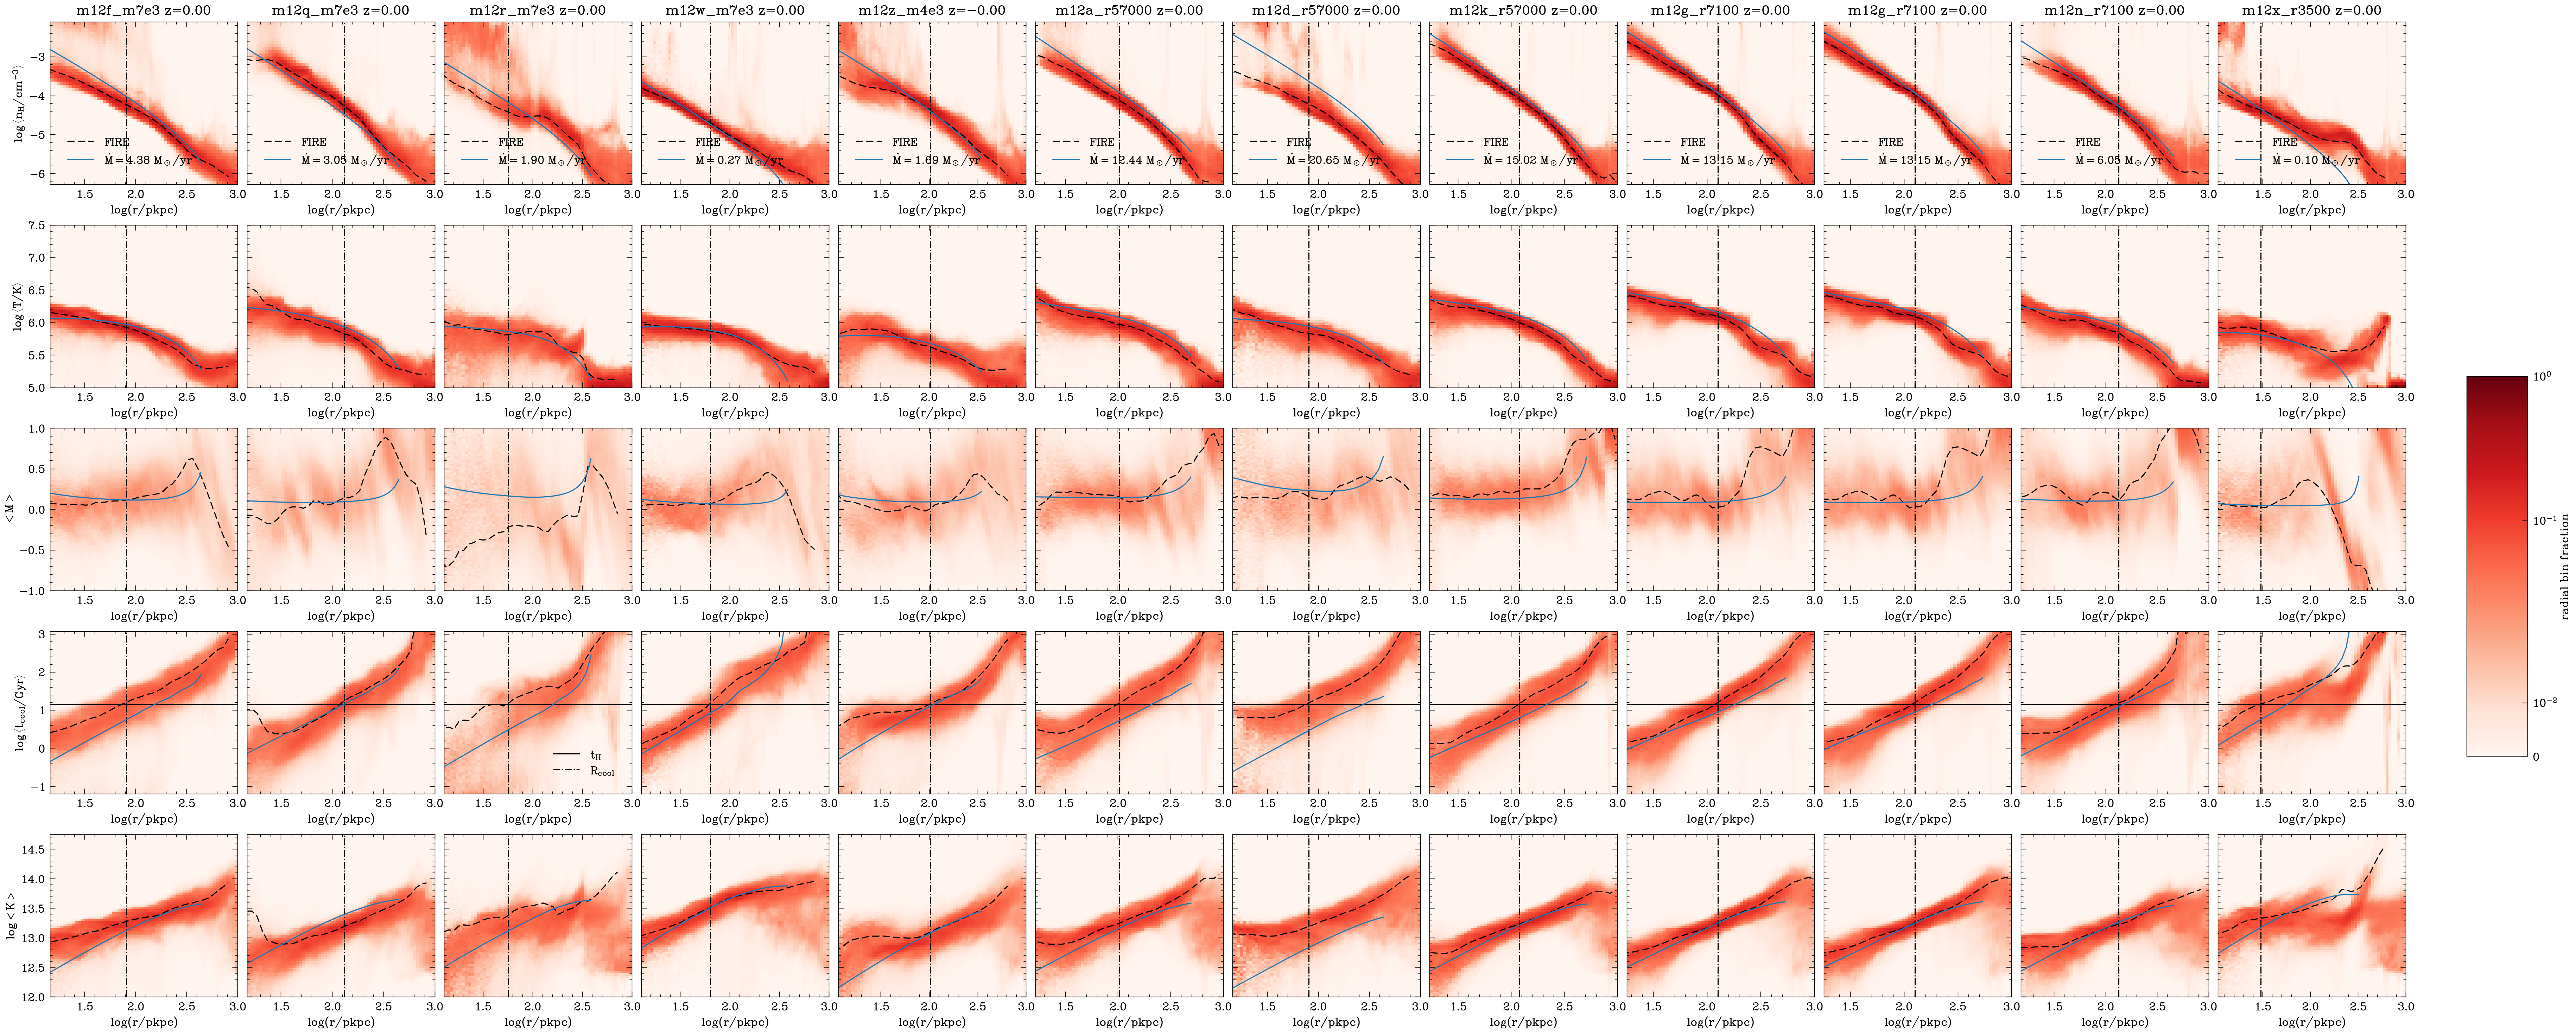

In [23]:
makecoolingflow([res_cf['m12f_NoBH'], res_cf['m12q_NoBH'], res_cf['m12r_NoBH'], res_cf['m12w_NoBH'], res_cf['m12z_NoBH'], res_cf['m12a_NoBH'], res_cf['m12d_NoBH'], res_cf['m12k_NoBH'], res_cf['m12g_NoBH'], res_cf['m12g_NoBH'], res_cf['m12n_NoBH'], res_cf['m12x_NoBH']])

# plt.savefig('/Users/imran/Desktop/m12_new_Tcut.png')

2.523594698299904
2.523594698299904
2.523594698299904
2.523594698299904
2.523594698299904
2.5053678462404934
2.5053678462404934
2.5053678462404934
2.5053678462404934
2.5053678462404934
2.4897337532035646
2.4897337532035646
2.4897337532035646
2.4897337532035646
2.4897337532035646
2.488528442969779
2.488528442969779
2.488528442969779
2.488528442969779
2.488528442969779
2.443894317474943
2.443894317474943
2.443894317474943
2.443894317474943
2.443894317474943


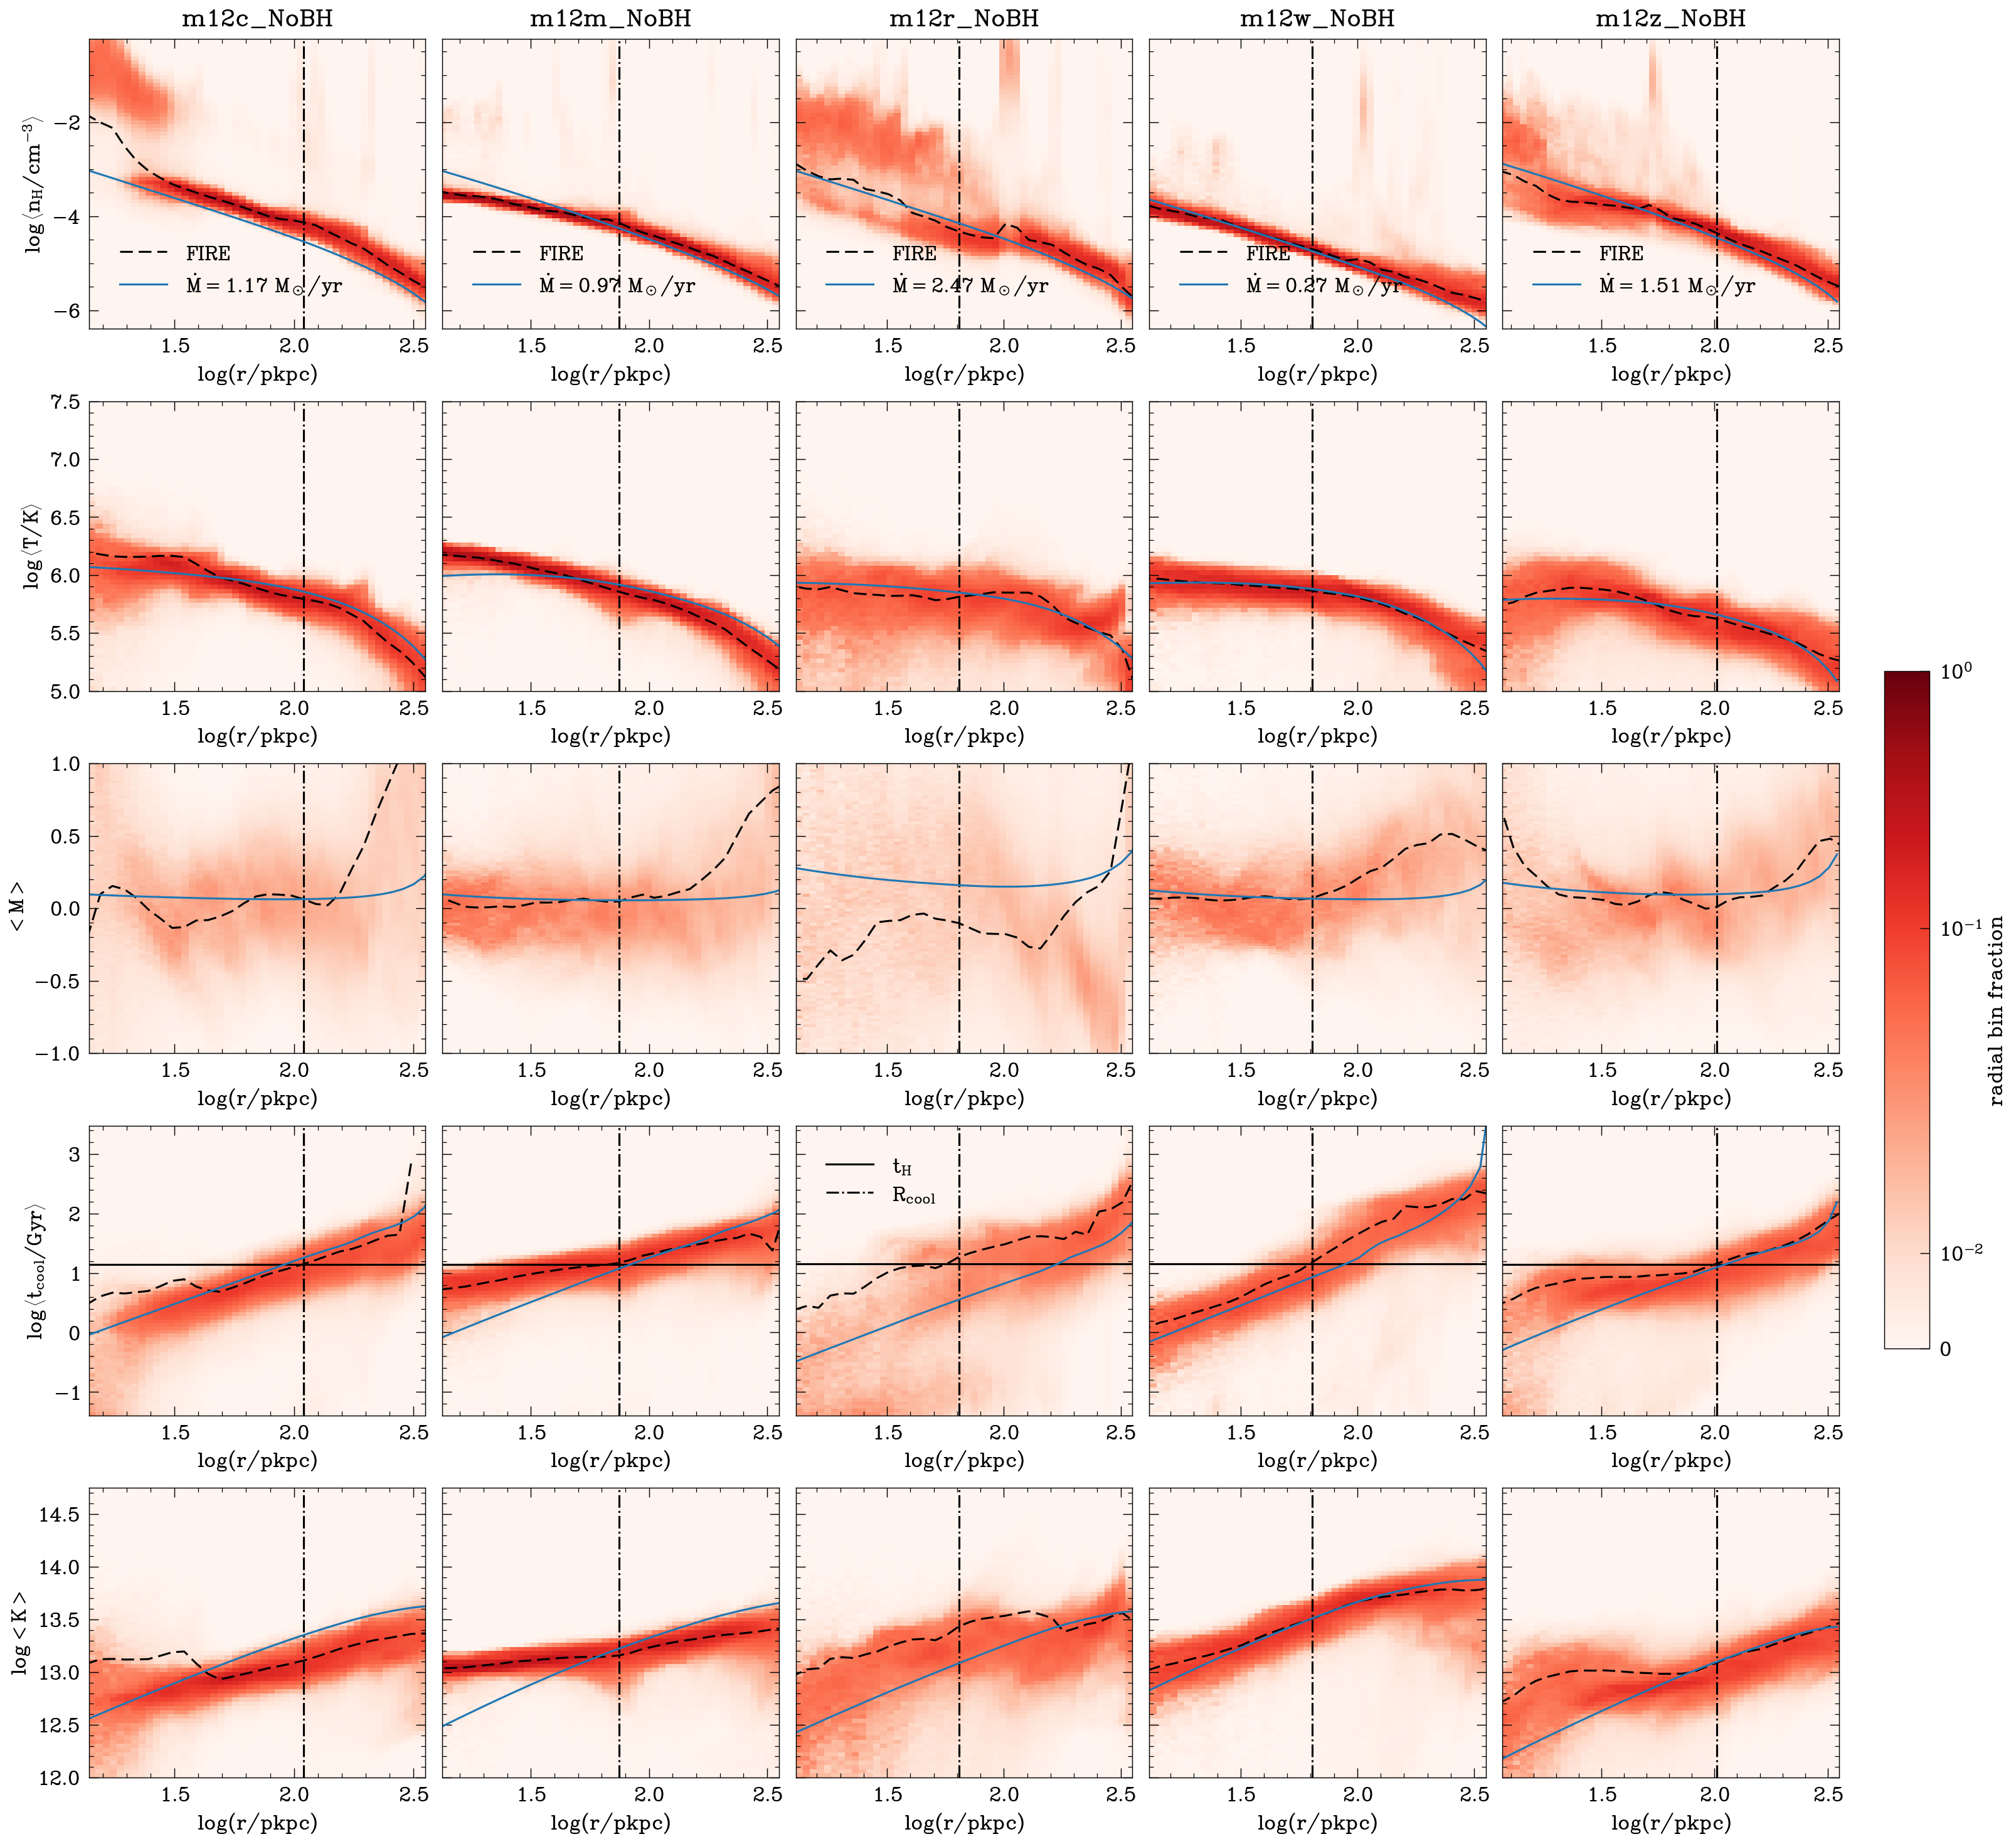

In [30]:
makecoolingflow([res_cf['m12c_NoBH'], res_cf['m12m_NoBH'], res_cf['m12r_NoBH'], res_cf['m12w_NoBH'], res_cf['m12z_NoBH']])